# Práctica 43: Limpieza, manejo y transformación de datos con Pandas

####  Cargar el fichero **retail2.csv** en un dataframe de Pandas y efectuar todas las operaciones de consulta, exploración y limpieza de datos que sean necesarios algunos pasos de limpieza están de forma explícita como preguntas. Los ficheros contienen varias columnas y algunas de ellas tienen datos que podrían necesitar limpieza o tratamiento. 

**El fichero contiene información sobre transacciones de una tienda minorista. Los campos y su significado se muestran a continuación:**

`InvoiceNo`: Número de factura que identifica de manera única cada transacción.
  

`StockCode`:Código de stock que identifica de manera única cada producto.
 

`Descrption`.Descripción del producto.


`Quantity`: Cantidad de productos comprados (puede contener valores negativos que indican devoluciones).

`InvoiceDate`: Fecha y hora en que se realizó la transacción.


`UnitPrice`:Precio unitario del producto (algunos valores pueden estar en centavos en lugar de dólares).


`CustomerID`:ID único del cliente que realizó la compra.


`Country`:País donde reside el cliente (puede contener inconsistencias en mayúsculas/minúsculas y caracteres especiales).  

`CustomerName`:Nombre completo del cliente.


`Email`:Dirección de correo electrónico del cliente.  

`Address`:Dirección del cliente.  



`PhoneNumber`:Número de teléfono del cliente.



`Category`: Categoría del producto (por ejemplo, 'Electronics', 'Clothing', 'Home & Garden').

`Supplier`: Proveedor del producto.  

`StockLevel`: Nivel de inventario del producto.

`Discount`: Descuento aplicado al producto (en porcentaje).  

`SaleChannel`: Canal de venta (por ejemplo, 'Online', 'In-Store').

`ReturnStatus`: Estado de devolución del producto ('Returned', 'Not Returned').

`ProductWeight`: Peso del producto. Unidad: kilogramos.

`ProductDimensions`: Dimensiones del producto. Unidad: en el formato 'LxWxH cm'.

`ShippingCost`: Costo de envío. Unidad:dólares.

`SalesRegion`: Región de ventas (por ejemplo, 'North America', 'Europe', 'Asia').  

`PromotionCode`: Código de promoción aplicado a la compra.

`PaymentMethod`: Método de pago (por ejemplo, 'Credit Card', 'PayPal', 'Bank Transfer').


# Parte 1. Data Cleaning and Preparation (Capítulo 7 - Wes McKinney)

- Cargue los datasets `retail2.csv` y `exchange_rates.csv` en DataFrames de pandas.

In [1]:
import numpy as np
import pandas as pd

data_retail2= pd.read_csv("Archivos/retail2.csv")
data_exchange_rates= pd.read_csv("Archivos/exchange_rates.csv")

df_1= pd.DataFrame(data_retail2)


# Leer el archivo CSV nuevamente para verificar el formato
df_1= pd.read_csv("Archivos/retail2.csv")

df_2= pd.DataFrame(data_exchange_rates)

# De ahora en adelante me refiero a df_1 como el DataSet retail
# De ahora en adelante me refiero a df_2 como el DataSet exchange_rates

print(df_1.head())
print()
print(df_2.head())

   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

           InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0  14/02/2010 12:09:15       4.25       17763  United Kingdom   David Johnson   
1  14/04/2010 12:09:15     795.00       15939  United Kingdom  Henry Williams   
2  16/05/2010 15:59:40       1.85       12295  United Kingdom      Jane Brown   
3  30/04/2010 17:30:11       1.65       15685  United Kingdom   Frank Johnson   
4  22/04/2010 10:07:49       4.25       11946  United Kingdom     Alice Smith   

                       Email  ... StockLevel Discount SaleChannel  \
0     david

In [115]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          382 non-null    int64  
 1   StockCode          382 non-null    object 
 2   Description        382 non-null    object 
 3   Quantity           382 non-null    int64  
 4   InvoiceDate        382 non-null    object 
 5   UnitPrice          382 non-null    float64
 6   CustomerID         382 non-null    int64  
 7   Country            382 non-null    object 
 8   CustomerName       382 non-null    object 
 9   Email              382 non-null    object 
 10  Address            382 non-null    object 
 11  PhoneNumber        382 non-null    object 
 12  Category           382 non-null    object 
 13  Supplier           382 non-null    object 
 14  StockLevel         382 non-null    int64  
 15  Discount           382 non-null    float64
 16  SaleChannel        382 non

In [116]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          60 non-null     object 
 1   ExchangeRate  60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


## Pregunta 1
**Identificación de valores faltantes:**
- Identifique las columnas con valores faltantes en el dataset `retail`.

In [164]:
# Identificando las columnas con valores faltantes
valores_faltantes = df_1.isnull().sum()

# Filtrando valores faltantes
col_faltantes = valores_faltantes[valores_faltantes > 0]


print(f"Columnas con valores faltantes:\n{col_faltantes}")


Columnas con valores faltantes:
PromotionCode    73
dtype: int64


## Pregunta 2
**Eliminar valores faltantes:**
- Elimine las filas del dataset `retail` donde las columnas críticas (`InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `CustomerID`) tengan valores faltantes.

In [165]:
# Eliminado registros con valores faltantes en las columnas
columnas_criticas = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']
df_1 = df_1.dropna(subset=columnas_criticas)

# Verificando
print(df_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          382 non-null    int64  
 1   StockCode          382 non-null    object 
 2   Description        382 non-null    object 
 3   Quantity           382 non-null    int64  
 4   InvoiceDate        382 non-null    object 
 5   UnitPrice          382 non-null    float64
 6   CustomerID         382 non-null    int64  
 7   Country            382 non-null    object 
 8   CustomerName       382 non-null    object 
 9   Email              382 non-null    object 
 10  Address            382 non-null    object 
 11  PhoneNumber        382 non-null    object 
 12  Category           382 non-null    object 
 13  Supplier           382 non-null    object 
 14  StockLevel         382 non-null    int64  
 15  Discount           382 non-null    float64
 16  SaleChannel        382 non

## Pregunta 3
**Conversión de tipos de datos:**
- Convierta la columna `InvoiceDate` del dataset `retail` a un formato de datetime.

In [166]:
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

print(df_1.info())
print()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          382 non-null    int64         
 1   StockCode          382 non-null    object        
 2   Description        382 non-null    object        
 3   Quantity           382 non-null    int64         
 4   InvoiceDate        375 non-null    datetime64[ns]
 5   UnitPrice          382 non-null    float64       
 6   CustomerID         382 non-null    int64         
 7   Country            382 non-null    object        
 8   CustomerName       382 non-null    object        
 9   Email              382 non-null    object        
 10  Address            382 non-null    object        
 11  PhoneNumber        382 non-null    object        
 12  Category           382 non-null    object        
 13  Supplier           382 non-null    object        
 14  StockLevel

C:\Users\REY\AppData\Local\Temp\ipykernel_12248\3906934680.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2010-02-14 12:09:15,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446,21756,DOORMAT NEW ENGLAND,100,2010-04-14 12:09:15,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633,22632,HAND WARMER RED POLKA DOT,6,2010-05-16 15:59:40,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522,22111,SCANDINAVIAN REDS RIBBONS,10,2010-04-30 17:30:11,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
4,536694,22960,JAM MAKING SET WITH JARS,6,2010-04-22 10:07:49,4.25,11946,United Kingdom,Alice Smith,alice.smith@mail.com,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 4
**Conversión de tipos de datos en tasas de cambio:**
- Convierta la columna `Date` del dataset `exchange_rates.csv` a un formato de datetime.

In [167]:
df_2['Date']= pd.to_datetime(df_2['Date'], errors='coerce')
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          60 non-null     datetime64[ns]
 1   ExchangeRate  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20


## Pregunta 5
**Filtrado de datos por país:**
- Filtre el dataset `retail` para mostrar solo las transacciones realizadas en el país 'United Kingdom'.

In [168]:
# Filtrando las transacciones realizadas en 'United Kingdom'
df_unitedk = df_1[df_1['Country'] == 'United Kingdom']

# Mostrando las primeras filas del resultado filtrado
print(df_unitedk.head())


   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

          InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0 2010-02-14 12:09:15       4.25       17763  United Kingdom   David Johnson   
1 2010-04-14 12:09:15     795.00       15939  United Kingdom  Henry Williams   
2 2010-05-16 15:59:40       1.85       12295  United Kingdom      Jane Brown   
3 2010-04-30 17:30:11       1.65       15685  United Kingdom   Frank Johnson   
4 2010-04-22 10:07:49       4.25       11946  United Kingdom     Alice Smith   

                       Email  ... StockLevel Discount SaleChannel  \
0     david.johns

## Pregunta 6
**Calcular el total de precios:**
- Cree una nueva columna `TotalPrice` en el dataset `retail` multiplicando `Quantity` por `UnitPrice`.

In [169]:
# Convirtiendo Quantity y UnitPrice a numéricos, forzando cualquier valor no numérico a NaN
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Manejar posibles valores nulos en Quantity o UnitPrice eliminándolos
df_1 = df_1.dropna(subset=['Quantity', 'UnitPrice'])

# Crear la columna TotalPrice
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Verificando resultados
print(df_1[['Quantity', 'UnitPrice', 'TotalPrice']].head())


   Quantity  UnitPrice  TotalPrice
0         6       4.25        25.5
1       100     795.00     79500.0
2         6       1.85        11.1
3        10       1.65        16.5
4         6       4.25        25.5


## Pregunta 7
**Extraer mes y año:**
- Extraiga el mes y el año de la columna `InvoiceDate` y cree dos nuevas columnas: `InvoiceMonth` y `InvoiceYear`.

In [170]:
df_1['InvoiceMonth'] = df_1['InvoiceDate'].dt.month
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Mostrando resultados
print(df_1[['InvoiceDate', 'InvoiceMonth', 'InvoiceYear']].head())



          InvoiceDate  InvoiceMonth  InvoiceYear
0 2010-02-14 12:09:15           2.0       2010.0
1 2010-04-14 12:09:15           4.0       2010.0
2 2010-05-16 15:59:40           5.0       2010.0
3 2010-04-30 17:30:11           4.0       2010.0
4 2010-04-22 10:07:49           4.0       2010.0


## Pregunta 8
**Eliminar duplicados:**
- Identifique y elimine las filas duplicadas en el dataset `retail` basadas en la combinación de `InvoiceNo` y `StockCode`.

In [171]:
# Identificando las filas duplicadas segun criterio de InvoiceNo y StockCode
duplicados = df_1[df_1.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]

# Mostrar las filas duplicadas
print(f"{duplicados}\n")
print("Cantidad de filas duplicadas antes de eliminar:", duplicados.shape[0])

     InvoiceNo StockCode                         Description  Quantity  \
14      536375     22960            JAM MAKING SET WITH JARS         6   
18      536443     22112          CHOCOLATE HOT WATER BOTTLE        10   
51      536560     22634        BAKING SET 9 PIECE RETROSPOT         6   
53      536399     21754            HOME BUILDING BLOCK WORD         3   
59      536564    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
..         ...       ...                                 ...       ...   
370     536427     22622      BOX OF VINTAGE ALPHABET BLOCKS         2   
376     536409     22384        PACK OF 6 SMALL FRUIT STRAWS        15   
377     536672     22632           HAND WARMER RED POLKA DOT         6   
378     536529    84029E      RED WOOLLY HOTTIE WHITE HEART.         6   
379     536396     22623        BOX OF VINTAGE JIGSAW BLOCKS         3   

            InvoiceDate  UnitPrice  CustomerID         Country   CustomerName  \
14  2010-02-19 15:32:52       

In [13]:
# Eliminando filas duplicadas, conservando la primera ocurrencia
df_1_sin_duplicados = df_1.drop_duplicates(subset=['InvoiceNo', 'StockCode'], keep='first')

# Mostrar el DataFrame para verificar que las filas duplicadas se han eliminado
print(df_1.head())
print()
duplicados_despues = df_1_sin_duplicados[df_1_sin_duplicados.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]
print("Cantidad de filas duplicadas después de eliminar:", duplicados_despues.shape[0])

   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

  InvoiceDate UnitPrice  CustomerID         Country    CustomerName  \
0  2010-03-06      4.25       17763  United Kingdom   David Johnson   
1  2010-04-02     795.0       15939  United Kingdom  Henry Williams   
2  2010-01-17      1.85       12295  United Kingdom      Jane Brown   
3  2010-04-26      1.65       15685  United Kingdom   Frank Johnson   
4  2010-02-15      4.25       11946  United Kingdom     Alice Smith   

                       Email  ... SaleChannel  ReturnStatus ProductWeight  \
0     david.johnson@mail.com  ...      Online  Not Returned    

## Pregunta 9
**Reemplazo de valores:**
- Reemplace todos los valores negativos en la columna `Quantity` con cero.

In [172]:
# Reemplazando valores negativos en la columna Quantity con cero
df_1['Quantity'] = df_1['Quantity'].clip(lower=0)

# Mostrando los resultados de las primeras filas
print(df_1.head())

   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

          InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0 2010-02-14 12:09:15       4.25       17763  United Kingdom   David Johnson   
1 2010-04-14 12:09:15     795.00       15939  United Kingdom  Henry Williams   
2 2010-05-16 15:59:40       1.85       12295  United Kingdom      Jane Brown   
3 2010-04-30 17:30:11       1.65       15685  United Kingdom   Frank Johnson   
4 2010-04-22 10:07:49       4.25       11946  United Kingdom     Alice Smith   

                       Email  ...  ReturnStatus ProductWeight  \
0     david.johnson@m

## Pregunta 10
**Transformación de datos:**
- Cree una nueva columna `DiscountedPrice` aplicando un descuento del 10% al `TotalPrice`.

In [173]:
# Asegurando de que TotalPrice está calculado
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Aplican un descuento del 10% al TotalPrice para crear la columna DiscountedPrice
df_1['DiscountedPrice'] = df_1['TotalPrice'] * 0.90

# Mostrando los resultados de las primeras filas para verificar
print(df_1[['TotalPrice', 'DiscountedPrice']].head())


   TotalPrice  DiscountedPrice
0        25.5            22.95
1     79500.0         71550.00
2        11.1             9.99
3        16.5            14.85
4        25.5            22.95


# Parte 2. Data Wrangling: Join, Combine, and Reshape (Capítulo 8)

## Pregunta 11
**Merge de datasets:**
- Realice un merge del dataset `retail` con el dataset `exchange_rates.csv` en las columnas de fecha (`InvoiceDate` de `retail` y `Date` de `exchange_rates.csv`).

In [174]:
print("'merge' con 'how=inner'")
merged_df = pd.merge(df_1, df_2, left_on='InvoiceDate', right_on='Date', how='inner')
# Mostrando los resultados de  las primeras filas para verificar
print(merged_df.head())

'merge' con 'how=inner'
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CustomerName, Email, Address, PhoneNumber, Category, Supplier, StockLevel, Discount, SaleChannel, ReturnStatus, ProductWeight, ProductDimensions, ShippingCost, SalesRegion, PromotionCode, PaymentMethod, TotalPrice, InvoiceMonth, InvoiceYear, DiscountedPrice, Date, ExchangeRate]
Index: []

[0 rows x 30 columns]


In [33]:
print("'merge' con 'how=left'")
merged_df = pd.merge(df_1, df_2, left_on='InvoiceDate', right_on='Date', how='left')
# Mostrando los resultados de  las primeras filas para verificar
print(merged_df.head())

'merge' con 'how=left'
   InvoiceNo StockCode                 Description  Quantity  \
0     536446     21756         DOORMAT NEW ENGLAND       100   
1     536633     22632   HAND WARMER RED POLKA DOT         6   
2     536522     22111   SCANDINAVIAN REDS RIBBONS        10   
3     536694     22960    JAM MAKING SET WITH JARS         6   
4     536620     22112  CHOCOLATE HOT WATER BOTTLE        10   

          InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0 2010-12-01 10:16:00     795.00       15939  United Kingdom  Henry Williams   
1 2010-12-01 13:23:00       1.85       12295  United Kingdom      Jane Brown   
2 2010-12-01 11:32:00       1.65       15685  United Kingdom   Frank Johnson   
3 2010-12-01 14:24:00       4.25       11946  United Kingdom     Alice Smith   
4 2010-12-01 13:10:00       3.39       13644  United Kingdom    Grace Miller   

                       Email  ... ShippingCost    SalesRegion PromotionCode  \
0    henry.williams@test.org  ..

## Pregunta 12
**Concatenación de datasets:**
- Concatenar dos subconjuntos del dataset `retail`, uno con las primeras 100 filas y otro con las últimas 100 filas.

In [175]:
# Primeras 100 filas
p_100 = df_1.head(100)

# Últimas 100 filas
u_100 = df_1.tail(100)

# Concatenar las dos partes
concatenado_df = pd.concat([p_100, u_100])

print("Mostrando las primeras filas del DataFrame concatenado")
print(concatenado_df.head())

Mostrando las primeras filas del DataFrame concatenado
   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

          InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0 2010-02-14 12:09:15       4.25       17763  United Kingdom   David Johnson   
1 2010-04-14 12:09:15     795.00       15939  United Kingdom  Henry Williams   
2 2010-05-16 15:59:40       1.85       12295  United Kingdom      Jane Brown   
3 2010-04-30 17:30:11       1.65       15685  United Kingdom   Frank Johnson   
4 2010-04-22 10:07:49       4.25       11946  United Kingdom     Alice Smith   

                       Email  .

In [176]:
print("Mostrando las últimas filas del DataFrame concatenado")
print(concatenado_df.tail())

Mostrando las últimas filas del DataFrame concatenado
     InvoiceNo StockCode                     Description  Quantity  \
377     536672     22632       HAND WARMER RED POLKA DOT         6   
378     536529    84029E  RED WOOLLY HOTTIE WHITE HEART.         6   
379     536396     22623    BOX OF VINTAGE JIGSAW BLOCKS         3   
380     536368     21777     RECIPE BOX WITH METAL HEART         4   
381     536472     22632       HAND WARMER RED POLKA DOT         6   

            InvoiceDate  UnitPrice  CustomerID  Country  CustomerName  \
377 2010-04-25 06:16:06       1.85       11526  Denmark  Grace Miller   
378 2010-01-23 06:16:07       3.39       19865  Denmark  Eva Williams   
379 2010-03-16 18:40:24       4.95       11361  Denmark   Grace Davis   
380 2010-03-19 14:12:56     795.00       19765  Denmark   David Smith   
381 2010-04-21 14:12:57       1.85       14370  Denmark   Alice Brown   

                       Email  ... ProductWeight ProductDimensions  \
377    grace.mill

## Pregunta 13
**Pivot table:**
- Cree una tabla dinámica (pivot table) que muestre el total de `TotalPrice` para cada `Country` y `InvoiceYear`.

In [177]:
# Asegurando que TotalPrice y InvoiceYear están calculados correctamente
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Convertir InvoiceDate a formato datetime y extraer el año
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Creando tabla dinámica
pivot_table = pd.pivot_table(
    df_1,
    values='TotalPrice',
    index='Country',
    columns='InvoiceYear',
    aggfunc='sum',
    fill_value=0
)

# Mostrando la tabla dinámica
print(pivot_table)


InvoiceYear        2010.0
Country                  
Denmark          67189.61
England             81.29
Germany          64594.51
United Kingdom  124370.99


## Pregunta 14
**Reshape con melt:**
- Transforme el dataset `retail` de formato ancho a largo usando la función `melt` de pandas.

In [178]:
# Asegurando que las columnas son del tipo adecuado
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Definir las columnas fijas (identificadoras) y las columnas a transformar
identifiers = ['InvoiceNo', 'StockCode', 'InvoiceDate', 'Quantity', 'UnitPrice']
value_vars = [col for col in df_1.columns if col not in identifiers]

# Transformar de formato ancho a largo usando melt
df_largo = pd.melt(
    df_1,
    id_vars=identifiers,  # Columnas fijas
    value_vars=value_vars,  # Columnas a transformar
    var_name='Variable',  # Nombre de la columna que contendrá los nombres de las columnas originales
    value_name='Value'     # Nombre de la columna que contendrá los valores correspondientes
)

# Mostrando las primeras filas del DataFrame transformado
print(df_largo.head())


   InvoiceNo StockCode         InvoiceDate  Quantity  UnitPrice     Variable  \
0     536578     84969 2010-02-14 12:09:15         6       4.25  Description   
1     536446     21756 2010-04-14 12:09:15       100     795.00  Description   
2     536633     22632 2010-05-16 15:59:40         6       1.85  Description   
3     536522     22111 2010-04-30 17:30:11        10       1.65  Description   
4     536694     22960 2010-04-22 10:07:49         6       4.25  Description   

                                Value  
0  BOX OF 6 ASSORTED COLOUR TEASPOONS  
1                 DOORMAT NEW ENGLAND  
2           HAND WARMER RED POLKA DOT  
3           SCANDINAVIAN REDS RIBBONS  
4            JAM MAKING SET WITH JARS  


## Pregunta 15
**Combinar datos con overlap:**
- Combine dos DataFrames con columnas `CustomerID` y `TotalPrice`, teniendo en cuenta el overlap entre los datos.

In [179]:
# Asegurando que las columnas son del tipo adecuado
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Asegurarse de que InvoiceDate es una columna de fechas y extraer el año
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Crear los dos subconjuntos de ejemplo
df_subset_1 = df_1[['CustomerID', 'TotalPrice']]
df_subset_2 = df_1[['CustomerID', 'TotalPrice', 'InvoiceYear']]
print("SubConjuntos para combinar, 'Creados'")


SubConjuntos para combinar, 'Creados'


In [39]:
print("Realizando el 'merge' en el 'Overlad'")
# Realizar el merge en la columna CustomerID
df_combinado = pd.merge(df_subset_1, df_subset_2, on='CustomerID', how='inner', suffixes=('_subset1', '_subset2'))

# Mostrando el DataFrame combinado
print(df_combinado)

Realizando el 'merge' en el 'Overlad'
     CustomerID  TotalPrice_subset1  TotalPrice_subset2  InvoiceYear
0         15939            79500.00            79500.00         2010
1         12295               11.10               11.10         2010
2         15685               16.50               16.50         2010
3         11946               25.50               25.50         2010
4         13644               33.90               33.90         2010
..          ...                 ...                 ...          ...
302       11551               79.50               79.50         2010
303       11629               20.34               20.34         2010
304       11361               14.85               14.85         2010
305       19765             3180.00             3180.00         2010
306       14370               11.10               11.10         2010

[307 rows x 4 columns]


## Pregunta 16
**Join con índices:**
- Realice un join de dos DataFrames basándose en los índices.

In [180]:
import pandas as pd

# Crear DataFrames de ejemplo
dato_a = {
    'CustomerID': [14956, 12524, 18319],
    'TotalPrice': [500, 600, 950]
}

dato_b = {
    'Country': ['United Kingdom', 'Germany', 'Denmark'],
    'SalesRegion': ['Europa', 'America', 'America']
}

# Convertir a DataFrames y establecer el índice
df_3 = pd.DataFrame(dato_a, index=[10, 20, 30])
df_4 = pd.DataFrame(dato_b, index=[10, 20, 40])


df_unidos_inner = df_3.join(df_4, how='inner')
df_unidos_left = df_3.join(df_4, how='left') 
df_unidos_right = df_3.join(df_4, how='right') 
df_unidos_outer = df_3.join(df_4, how='outer') 

# Mostrando resultados
print("Realizando 'join' 'how=inner'")
print(df_unidos_inner)
print()
print("Realizando 'join' 'how=left'")
print(df_unidos_left)
print()
print("Realizando 'join' 'how=right'")
print(df_unidos_right)
print()
print("Realizando 'join' 'how=outer'")
print(df_unidos_outer)

Realizando 'join' 'how=inner'
    CustomerID  TotalPrice         Country SalesRegion
10       14956         500  United Kingdom      Europa
20       12524         600         Germany     America

Realizando 'join' 'how=left'
    CustomerID  TotalPrice         Country SalesRegion
10       14956         500  United Kingdom      Europa
20       12524         600         Germany     America
30       18319         950             NaN         NaN

Realizando 'join' 'how=right'
    CustomerID  TotalPrice         Country SalesRegion
10     14956.0       500.0  United Kingdom      Europa
20     12524.0       600.0         Germany     America
40         NaN         NaN         Denmark     America

Realizando 'join' 'how=outer'
    CustomerID  TotalPrice         Country SalesRegion
10     14956.0       500.0  United Kingdom      Europa
20     12524.0       600.0         Germany     America
30     18319.0       950.0             NaN         NaN
40         NaN         NaN         Denmark     Americ

## Pregunta 17
**Cambio de nivel de índices:**
- Cambie los niveles de los índices en un MultiIndex en el dataset `retail`.

In [181]:
# Convertir 'InvoiceDate' a formato de fecha
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Extraer el año de 'InvoiceDate'
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Por ejemplo, vamos a crear el MultiIndex con 'Country' y 'InvoiceYear'
df_1.set_index(['Country', 'InvoiceYear'], inplace=True)

# Mostrando el DataFrame con MultiIndex
print("DataFrame con MultiIndex:")
print(df_1.head())


DataFrame con MultiIndex:
                            InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010.0          536578     84969   
               2010.0          536446     21756   
               2010.0          536633     22632   
               2010.0          536522     22111   
               2010.0          536694     22960   

                                                   Description  Quantity  \
Country        InvoiceYear                                                 
United Kingdom 2010.0       BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
               2010.0                      DOORMAT NEW ENGLAND       100   
               2010.0                HAND WARMER RED POLKA DOT         6   
               2010.0                SCANDINAVIAN REDS RIBBONS        10   
               2010.0                 JAM MAKING SET WITH JARS         6   

                                   InvoiceDate  UnitPrice  CustomerID  \
Country   

## Pregunta 18
**Reordenamiento de niveles:**
- Reordene los niveles del índice en un DataFrame con MultiIndex.

In [182]:
# Reordenar los niveles del índice
df_reordenado = df_1.reorder_levels(['InvoiceYear', 'Country'])

# Mostrando el DataFrame con niveles reordenados
print("\nDataFrame con niveles reordenados:")
print(df_reordenado.head())



DataFrame con niveles reordenados:
                            InvoiceNo StockCode  \
InvoiceYear Country                               
2010.0      United Kingdom     536578     84969   
            United Kingdom     536446     21756   
            United Kingdom     536633     22632   
            United Kingdom     536522     22111   
            United Kingdom     536694     22960   

                                                   Description  Quantity  \
InvoiceYear Country                                                        
2010.0      United Kingdom  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
            United Kingdom                 DOORMAT NEW ENGLAND       100   
            United Kingdom           HAND WARMER RED POLKA DOT         6   
            United Kingdom           SCANDINAVIAN REDS RIBBONS        10   
            United Kingdom            JAM MAKING SET WITH JARS         6   

                                   InvoiceDate  UnitPrice  CustomerID  \


## Pregunta 19
**Agregación por nivel:**
- Realice una agregación de los datos por nivel en un MultiIndex.

In [183]:
Ag_country = df_1.groupby(level='Country').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'UnitPrice': 'mean'
})

# Mostrar los resultados de la agregación por 'Country'
print("Agregación por 'Country':")
print(Ag_country)


Agregación por 'Country':
                Quantity  TotalPrice  UnitPrice
Country                                        
Denmark             1185    67213.31  18.916279
England               31       81.29   3.138000
Germany             1154    64667.15  32.405366
United Kingdom      1280   124382.09  20.351200


In [184]:

Ag_year = df_1.groupby(level='InvoiceYear').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'UnitPrice': 'mean'
})

# Mostrar los resultados de la agregación por 'InvoiceYear'
print("Agregación por 'InvoiceYear':")
print(Ag_year)


Agregación por 'InvoiceYear':
             Quantity  TotalPrice  UnitPrice
InvoiceYear                                 
2010.0           3600    256236.4   23.91976


## Pregunta 20
**Creación de MultiIndex:**
- Cree un MultiIndex a partir de las columnas `Country` y `InvoiceYear` en el dataset `retail`.

In [185]:
import pandas as pd

data_retail2= pd.read_csv("Archivos/retail2.csv")
df_1=pd.DataFrame(data_retail2)

print("Preparando columnas")
# Convertir 'InvoiceDate' a formato de fecha
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Extraer el año de 'InvoiceDate' y crear una nueva columna 'InvoiceYear'
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Mostrar las primeras filas del DataFrame para verificar
print("DataFrame original:")
print(df_1.head())
print()
print("Columnas listas...")

Preparando columnas
DataFrame original:
   InvoiceNo StockCode                         Description  Quantity  \
0     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
1     536446     21756                 DOORMAT NEW ENGLAND       100   
2     536633     22632           HAND WARMER RED POLKA DOT         6   
3     536522     22111           SCANDINAVIAN REDS RIBBONS        10   
4     536694     22960            JAM MAKING SET WITH JARS         6   

          InvoiceDate  UnitPrice  CustomerID         Country    CustomerName  \
0 2010-02-14 12:09:15       4.25       17763  United Kingdom   David Johnson   
1 2010-04-14 12:09:15     795.00       15939  United Kingdom  Henry Williams   
2 2010-05-16 15:59:40       1.85       12295  United Kingdom      Jane Brown   
3 2010-04-30 17:30:11       1.65       15685  United Kingdom   Frank Johnson   
4 2010-04-22 10:07:49       4.25       11946  United Kingdom     Alice Smith   

                       Email  ... Discount Sal

C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2759420298.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


In [186]:
print("Creando 'MultiIndex'")

df_1.set_index(['Country', 'InvoiceYear'], inplace=True)

# Mostrando el DataFrame con el nuevo MultiIndex
print("DataFrame con MultiIndex:")
print(df_1.head())


Creando 'MultiIndex'
DataFrame con MultiIndex:
                            InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010.0          536578     84969   
               2010.0          536446     21756   
               2010.0          536633     22632   
               2010.0          536522     22111   
               2010.0          536694     22960   

                                                   Description  Quantity  \
Country        InvoiceYear                                                 
United Kingdom 2010.0       BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
               2010.0                      DOORMAT NEW ENGLAND       100   
               2010.0                HAND WARMER RED POLKA DOT         6   
               2010.0                SCANDINAVIAN REDS RIBBONS        10   
               2010.0                 JAM MAKING SET WITH JARS         6   

                                   InvoiceDate  UnitPrice  Cus

# Parte 3 Data Aggregation and Group Operations (Capitulo 10)

## Pregunta 21
**Agrupación por cliente:**
- Agrupe los datos del dataset `retail` por `CustomerID` y calcule el total de `TotalPrice` por cliente.

In [187]:
print("Preparando las columnas")

import pandas as pd


# Convertir 'InvoiceDate' a formato de fecha
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Convertir 'Quantity' y 'UnitPrice' a tipo numérico, forzando errores a NaN
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Crear la columna 'TotalPrice' multiplicando 'Quantity' por 'UnitPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Mostrar las primeras filas del DataFrame para verificar
print("DataFrame con TotalPrice:")
print(df_1.head())



Preparando las columnas
DataFrame con TotalPrice:
                            InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010.0          536578     84969   
               2010.0          536446     21756   
               2010.0          536633     22632   
               2010.0          536522     22111   
               2010.0          536694     22960   

                                                   Description  Quantity  \
Country        InvoiceYear                                                 
United Kingdom 2010.0       BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
               2010.0                      DOORMAT NEW ENGLAND       100   
               2010.0                HAND WARMER RED POLKA DOT         6   
               2010.0                SCANDINAVIAN REDS RIBBONS        10   
               2010.0                 JAM MAKING SET WITH JARS         6   

                                   InvoiceDate  UnitPrice  

In [188]:
print("Agrupando por 'CustomerID' y calcular el total de 'TotalPrice'")
total_precio_por_cliente = df_1.groupby('CustomerID')['TotalPrice'].sum()

# Mostrar el resultado
print("Total de 'Precio' agrupado por 'Id Cliente':")
print(total_precio_por_cliente)


Agrupando por 'CustomerID' y calcular el total de 'TotalPrice'
Total de 'Precio' agrupado por 'Id Cliente':
CustomerID
10018      14.85
10049      15.30
10082      12.50
10112      20.34
10139      29.70
          ...   
19741      30.00
19765    3180.00
19821      30.00
19865      35.34
19944      16.50
Name: TotalPrice, Length: 375, dtype: float64


## Pregunta 22
**Agrupación por producto:**
- Agrupe los datos del dataset `retail` por `StockCode` y calcule la cantidad total vendida (`Quantity`).

In [189]:
print("Preparando los Datos")

# Convertir 'Quantity' a tipo numérico, forzando errores a NaN
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')

# Mostrando las primeras filas del DataFrame
print("DataFrame original:")
print(df_1.head())

# Verificando los tipos de datos actuales
print("Tipos de datos:")
print(df_1.dtypes)


Preparando los Datos
DataFrame original:
                            InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010.0          536578     84969   
               2010.0          536446     21756   
               2010.0          536633     22632   
               2010.0          536522     22111   
               2010.0          536694     22960   

                                                   Description  Quantity  \
Country        InvoiceYear                                                 
United Kingdom 2010.0       BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
               2010.0                      DOORMAT NEW ENGLAND       100   
               2010.0                HAND WARMER RED POLKA DOT         6   
               2010.0                SCANDINAVIAN REDS RIBBONS        10   
               2010.0                 JAM MAKING SET WITH JARS         6   

                                   InvoiceDate  UnitPrice  CustomerI

In [190]:
# Agrupando por 'StockCode' y calcular la cantidad total vendida
Agrupando_por_stock = df_1.groupby('StockCode')['Quantity'].sum()

# Mostrar el resultado
print("Cantidad total vendida por el Codigo de Stock (StockCode)':")
print(Agrupando_por_stock)


Cantidad total vendida por el Codigo de Stock (StockCode)':
StockCode
21723     320
21724     170
21730      36
21731     192
21754      27
21755      30
21756     142
21777      44
21914     144
22111     300
22112     156
22139      84
22310      42
22384      30
22386      10
22469       6
22570       6
22571       6
22622      18
22623      24
22624       6
22632     114
22633      48
22634      90
22725       6
22745      42
22748     102
22749      56
22751      10
22752      20
22754       6
22960     108
71053     120
84029E     96
84029G    102
84406B     56
84879     192
84907A     20
84907B    400
84907C     20
84969      54
84988      12
85099B     10
85123A     54
Name: Quantity, dtype: int64


## Pregunta 23
**Agrupación por mes y año:**
- Agrupe los datos del dataset `retail` por `InvoiceMonth` y `InvoiceYear`, y calcule el total de `TotalPrice`.

In [192]:
import pandas as pd

df_1= pd.read_csv("Archivos/retail2.csv")

# Convertiendo en formato numérico
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Calculando 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Extraer 'InvoiceMonth' y 'InvoiceYear' de 'InvoiceDate'
df_1['InvoiceMonth'] = df_1['InvoiceDate'].dt.month
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

# Restableciendo que están en el índice
df_1.reset_index(drop=True, inplace=True)

# Agrupando por 'InvoiceMonth' y 'InvoiceYear' y calcular el total de 'TotalPrice'
resultado = df_1.groupby(['InvoiceYear', 'InvoiceMonth'], as_index=False)['TotalPrice'].sum()

# Mostrar el resultado
print(resultado)


   InvoiceYear  InvoiceMonth  TotalPrice
0       2010.0           1.0    49089.72
1       2010.0           2.0     8523.74
2       2010.0           3.0    23412.79
3       2010.0           4.0   105554.85
4       2010.0           5.0    54088.25


C:\Users\REY\AppData\Local\Temp\ipykernel_12248\138739775.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 24
**Conteo de transacciones:**
- Cuente el número total de transacciones por `Country` y `InvoiceYear`.

In [193]:
import pandas as pd

df_1= pd.read_csv("Archivos/retail2.csv")

# Convertir 'InvoiceDate' a formato de fecha
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Crear la columna 'InvoiceYear' a partir de 'InvoiceDate'
df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year

print("\nContando el numero de transacciones por 'Country' y 'InvoiceYear'")

# Agrupar por 'Country' y 'InvoiceYear' y contar el número de transacciones
cantidad_transacciones = df_1.groupby(['Country', 'InvoiceYear']).size()

# Mostrar el resultado
print("Número total de transacciones por 'Country' y 'InvoiceYear':")
print(cantidad_transacciones)


Contando el numero de transacciones por 'Country' y 'InvoiceYear'
Número total de transacciones por 'Country' y 'InvoiceYear':
Country         InvoiceYear
Denmark         2010.0         127
England         2010.0           5
Germany         2010.0         119
United Kingdom  2010.0         124
dtype: int64


C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2954251672.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 25
**Función de agregación personalizada:**
- Cree una función de agregación personalizada que calcule el promedio y la desviación estándar de `TotalPrice` por `Country`.

In [194]:
import pandas as pd


df_1= pd.read_csv("Archivos/retail2.csv")

# Convertiendo en formato numerico
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Calculando 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Función de agregación personalizada
def calcular_agrupacion(df):
    resultado = df.groupby('Country')['TotalPrice'].agg(['mean', 'std']).reset_index()
    resultado.columns = ['Country', 'Prom_Precio', 'Dev_Std_Precio']
    return resultado

# Llamar a la función de agregación personalizada
resultado = calcular_agrupacion(df_1)

# Mostrar el resultado
print(resultado)


          Country  Prom_Precio  Dev_Std_Precio
0         Denmark   520.713643     3962.340589
1         England    16.258000        2.964594
2         Germany   401.358943     2998.465314
3  United Kingdom   993.250320     7463.835055


## Pregunta 26
**Agrupación y transformaciones:**
- Agrupe los datos por `CustomerID` y normalice el `TotalPrice` restando la media y dividiendo por la desviación estándar dentro de cada grupo.

In [195]:
# Convertiendo en formato numerico
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Calculando 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Agrupar por 'CustomerID' y normalizar el 'TotalPrice'
df_1['Normal_TotalPrice'] = df_1.groupby('CustomerID')['TotalPrice'].transform(
    lambda x: (x - x.mean()) / x.std()
)
# En este contexto, la 'x' de 'lambda' represneta 'TotalPrice'

# Mostrar el resultado
print(df_1[['CustomerID', 'TotalPrice', 'Normal_TotalPrice']].head())


   CustomerID  TotalPrice  Normal_TotalPrice
0       17763        25.5                NaN
1       15939     79500.0                NaN
2       12295        11.1                NaN
3       15685        16.5                NaN
4       11946        25.5                NaN


## Pregunta 27
**Filtrado de grupos:**
- Filtre los grupos de `CustomerID` que tengan un `TotalPrice` promedio mayor a 500.

In [196]:

# Convertir columnas relevantes a formato numérico
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Calcular 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Agrupar por 'CustomerID' y calcular el promedio de 'TotalPrice'
Promedio_Total = df_1.groupby('CustomerID')['TotalPrice'].mean()

# Filtrando
Promedio_mayor_500 = Promedio_Total[Promedio_Total > 500].index

# Filtrar el df_1 original para mantener solo las filas de los clientes (CustomerID) seleccionados
filtro_df = df_1[df_1['CustomerID'].isin(Promedio_mayor_500)]

# Resultados
print(filtro_df[['CustomerID', 'TotalPrice']].head())


     CustomerID  TotalPrice
1         15939     79500.0
25        15451      1500.0
27        17186      1785.0
57        13326     20340.0
107       10660     17000.0


## Pregunta 28
**Aplicación de múltiples funciones:**
- Aplique múltiples funciones de agregación (suma, promedio, máximo) a la columna `TotalPrice` agrupando por `Country`.

In [197]:
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')

# Calculando 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Agrupar por 'Country' y aplicar múltiples funciones de agregación a 'TotalPrice'
df_agrupado = df_1.groupby('Country')['TotalPrice'].agg(
    Sum_TotalPrice='sum',
    Mean_TotalPrice='mean',
    Max_TotalPrice='max'
).reset_index()

# Mostrar el resultado
print(df_agrupado)


          Country  Sum_TotalPrice  Mean_TotalPrice  Max_TotalPrice
0         Denmark        67172.06       520.713643        41700.00
1         England           81.29        16.258000           20.34
2         Germany        49367.15       401.358943        20340.00
3  United Kingdom       124156.29       993.250320        79500.00


## Pregunta 29
**Creación de columnas derivadas:**
- Cree una nueva columna `AvgTotalPrice` que contenga el promedio de `TotalPrice` por `CustomerID`.

In [198]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Agrupar por CustomerID y calcular el promedio de TotalPrice
avg_total_price = df_1.groupby('CustomerID')['TotalPrice'].mean().reset_index()
avg_total_price.rename(columns={'TotalPrice': 'AvgTotalPrice'}, inplace=True)

# Unir el DataFrame con el promedio calculado al DataFrame original
df_1 = df_1.merge(avg_total_price, on='CustomerID', how='left')

print(df_1[['CustomerID', 'TotalPrice', 'AvgTotalPrice']].head(20))



    CustomerID  TotalPrice  AvgTotalPrice
0        17763       25.50          25.50
1        15939    79500.00       79500.00
2        12295       11.10          11.10
3        15685       16.50          16.50
4        11946       25.50          25.50
5        12783      -41.70         -41.70
6        13644       33.90          33.90
7        15241       29.70          29.70
8        17557       11.10          11.10
9        12645       33.90          33.90
10       16589       12.50          12.50
11       16353       20.34          20.34
12       11932       20.34          20.34
13       11757       17.00          17.00
14       15637       25.50          25.50
15       11116       25.50          25.50
16       10492       33.90          33.90
17       18811      -41.70         -41.70
18       17888       33.90          33.90
19       16474       12.50          12.50


C:\Users\REY\AppData\Local\Temp\ipykernel_12248\629139227.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 30
**Uso de transformaciones window:**
- Utilice una transformación de ventana para calcular la media móvil de 3 períodos de `TotalPrice` para cada `CustomerID`.

In [199]:
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Convirtiendo a datetime si es necesario
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
# Ordenando por fecha
df_1 = df_1.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calcular la media móvil de 3 períodos de 'TotalPrice' para cada 'CustomerID'
df_1['MediaMovil_3'] = df_1.groupby('CustomerID')['TotalPrice'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Resultados
print(df_1[['CustomerID', 'TotalPrice', 'MediaMovil_3']].head(10))


     CustomerID  TotalPrice  MediaMovil_3
266       10018       14.85         14.85
264       10049       15.30         15.30
333       10082       12.50         12.50
254       10112       20.34         20.34
257       10139       29.70         29.70
177       10152       25.50         25.50
189       10166       25.50         25.50
205       10174       15.30         15.30
288       10201       20.34         20.34
159       10205       25.50         25.50


# Parte 4 - Time Series (capítulo 11)

## Pregunta 31
**Conversión a índice de tiempo:**
- Convierta la columna `InvoiceDate` a un índice de tiempo en el dataset `retail`.

In [200]:
import pandas as pd

df_1 = pd.read_csv('Archivos/retail2.csv')

# Convertir la columna 'InvoiceDate' a formato datetime
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Establecer 'InvoiceDate' como índice del DataFrame
df_1.set_index('InvoiceDate', inplace=True)

# Mostrando las primeras filas
print(df_1.head())


                     InvoiceNo StockCode                         Description  \
InvoiceDate                                                                    
2010-02-14 12:09:15     536578     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS   
2010-04-14 12:09:15     536446     21756                 DOORMAT NEW ENGLAND   
2010-05-16 15:59:40     536633     22632           HAND WARMER RED POLKA DOT   
2010-04-30 17:30:11     536522     22111           SCANDINAVIAN REDS RIBBONS   
2010-04-22 10:07:49     536694     22960            JAM MAKING SET WITH JARS   

                     Quantity  UnitPrice  CustomerID         Country  \
InvoiceDate                                                            
2010-02-14 12:09:15         6       4.25       17763  United Kingdom   
2010-04-14 12:09:15       100     795.00       15939  United Kingdom   
2010-05-16 15:59:40         6       1.85       12295  United Kingdom   
2010-04-30 17:30:11        10       1.65       15685  United Kingdom   
2010-04

C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2045012787.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 32
**Remuestreo de datos:**
- Remuestrear los datos del dataset `retail` a una frecuencia mensual y calcule el total de `TotalPrice` por mes.

In [201]:
import pandas as pd

df_1= pd.read_csv("Archivos/retail2.csv")

df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
df_1.set_index('InvoiceDate', inplace=True)

# Re-muestreando los datos a frecuencia mensual y calcular el total de 'TotalPrice' por mes
total_mensual = df_1['TotalPrice'].resample('M').sum()

# Resultado
print(total_mensual)


InvoiceDate
2010-01-31     49089.72
2010-02-28      8523.74
2010-03-31     23412.79
2010-04-30    105554.85
2010-05-31     54088.25
Name: TotalPrice, dtype: float64


C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2436366181.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2436366181.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_mensual = df_1['TotalPrice'].resample('M').sum()


## Pregunta 33
**Cambio de frecuencia:**
- Cambie la frecuencia de los datos del dataset `retail` a trimestral y calcule el total de `TotalPrice` por trimestre.

#### NOTA: Casi la totalidad de los valores de 'InvoiceDate' del archivo original 'retail2.csv' son del 'mes de enero de 2010', y del mismo dia (dia 12), es decir no hay valores de fecha sufientes para hacer consistente los calculos en series de tiempo.

##### Modifiqué los valores de la base de Datos csv 'retail2.csv', para poder obtener resultados con cierto nivel de lógica.

In [206]:
import pandas as pd

import pandas as pd

df_1= pd.read_csv("Archivos/retail2.csv")

df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']
df_1['UnitPrice'] = pd.to_numeric(df_1['TotalPrice'], errors='coerce')

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
df_1.set_index('InvoiceDate', inplace=True)

# Re-muestreando los datos a frecuencia trimestral y calcular el total de 'TotalPrice' por trimestre
total_trimestral = df_1['TotalPrice'].resample('Q').sum()

# Resultado
print(total_trimestral)


InvoiceDate
2010-03-31     81026.25
2010-06-30    159643.10
Name: TotalPrice, dtype: float64


C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2889742309.py:16: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
C:\Users\REY\AppData\Local\Temp\ipykernel_12248\2889742309.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  total_trimestral = df_1['TotalPrice'].resample('Q').sum()


## Pregunta 34
**Desplazamiento de datos:**
- Desplace los datos de `TotalPrice` en el dataset `retail` un período hacia adelante.

In [207]:
import pandas as pd

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

df_1.set_index('InvoiceDate', inplace=True)

# Desplazar los datos de 'TotalPrice' un período hacia adelante
df_1['TotalPrice_Desplazado'] = df_1['TotalPrice'].shift(1)

# Mostrando Resultados
print(df_1[['TotalPrice', 'TotalPrice_Desplazado']].head(20))


                     TotalPrice  TotalPrice_Desplazado
InvoiceDate                                           
2010-02-14 12:09:15       25.50                    NaN
2010-04-14 12:09:15    79500.00                  25.50
2010-05-16 15:59:40       11.10               79500.00
2010-04-30 17:30:11       16.50                  11.10
2010-04-22 10:07:49       25.50                  16.50
2010-02-19 12:25:39      -41.70                  25.50
2010-01-19 12:25:40       33.90                 -41.70
2010-05-16 07:34:17       29.70                  33.90
2010-04-13 00:33:39       11.10                  29.70
2010-03-21 14:42:35       33.90                  11.10
2010-02-21 14:42:36       12.50                  33.90
2010-05-21 14:42:37       20.34                  12.50
2010-04-21 14:42:38       20.34                  20.34
2010-03-19 15:32:51       17.00                  20.34
2010-02-19 15:32:52       25.50                  17.00
2010-01-19 15:32:53       25.50                  25.50
2010-04-30

C:\Users\REY\AppData\Local\Temp\ipykernel_12248\766219986.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 35
**Ventanas móviles:**
- Calcule la media móvil de 3 períodos de `TotalPrice` en el dataset `retail`.

In [208]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV (ajusta el nombre del archivo si es necesario)
df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors='coerce')
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'], errors='coerce')
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Establecer 'InvoiceDate' como índice del DataFrame
df_1.set_index('InvoiceDate', inplace=True)

# Calcular la media móvil de 3 períodos de 'TotalPrice'
df_1['mediaMovil_3'] = df_1['TotalPrice'].rolling(window=3).mean()
df_1['mediaMovil_3'] = df_1['mediaMovil_3'].round(2)

# Mostrar el resultado
print(df_1[['TotalPrice', 'mediaMovil_3']].head(20))


                     TotalPrice  mediaMovil_3
InvoiceDate                                  
2010-02-14 12:09:15       25.50           NaN
2010-04-14 12:09:15    79500.00           NaN
2010-05-16 15:59:40       11.10      26512.20
2010-04-30 17:30:11       16.50      26509.20
2010-04-22 10:07:49       25.50         17.70
2010-02-19 12:25:39      -41.70          0.10
2010-01-19 12:25:40       33.90          5.90
2010-05-16 07:34:17       29.70          7.30
2010-04-13 00:33:39       11.10         24.90
2010-03-21 14:42:35       33.90         24.90
2010-02-21 14:42:36       12.50         19.17
2010-05-21 14:42:37       20.34         22.25
2010-04-21 14:42:38       20.34         17.73
2010-03-19 15:32:51       17.00         19.23
2010-02-19 15:32:52       25.50         20.95
2010-01-19 15:32:53       25.50         22.67
2010-04-30 06:56:27       33.90         28.30
2010-01-26 04:41:47      -41.70          5.90
2010-03-29 03:43:14       33.90          8.70
2010-01-29 03:43:15       12.50   

C:\Users\REY\AppData\Local\Temp\ipykernel_12248\433137403.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


## Pregunta 36
**Detección de tendencias:**
- Detecte tendencias en la columna `TotalPrice` del dataset `retail` usando una ventana móvil de 12 períodos.

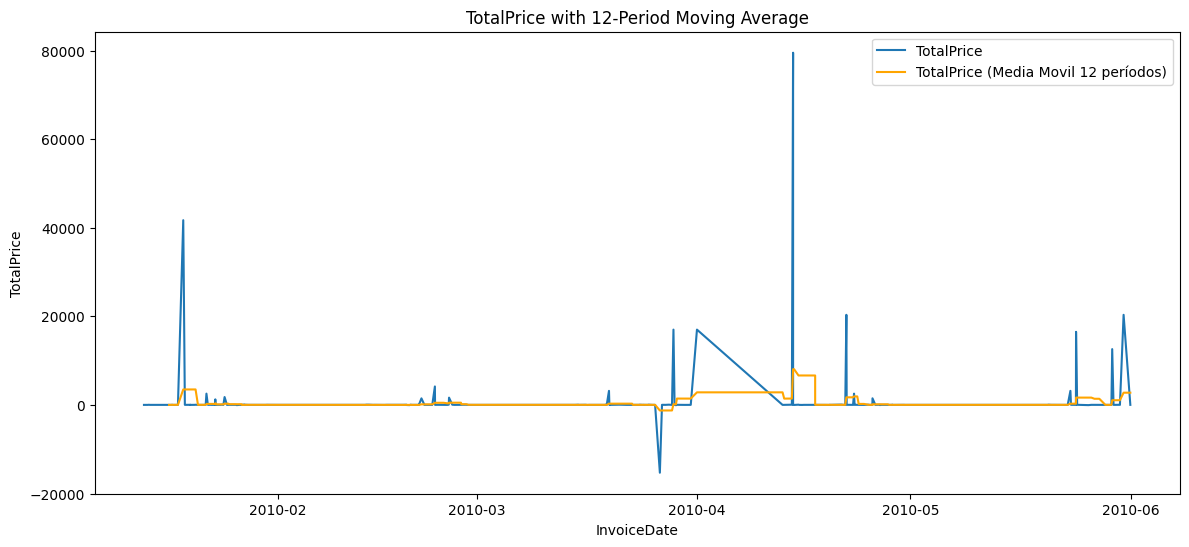

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

df_1 = pd.read_csv("Archivos/retail2.csv")

# Asegurando de que 'InvoiceDate' esté en formato datetime
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Calculando 'TotalPrice'
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Ordenando los datos por fecha 
df_1 = df_1.sort_values('InvoiceDate')

# Aplicando una ventana móvil de 12 períodos para detectar tendencias
df_1['TotalPrice_12'] = df_1['TotalPrice'].rolling(window=12).mean()

# Visualizar las tendencias
plt.figure(figsize=(14, 6))
plt.plot(df_1['InvoiceDate'], df_1['TotalPrice'], label='TotalPrice')
plt.plot(df_1['InvoiceDate'], df_1['TotalPrice_12'], color='orange', label='TotalPrice (Media Movil 12 períodos)')
plt.title('TotalPrice with 12-Period Moving Average')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()



## Pregunta 37
**Descomposición de series temporales:**
- Descomponga la serie temporal de `TotalPrice` en componentes de tendencia, estacionalidad y ruido.

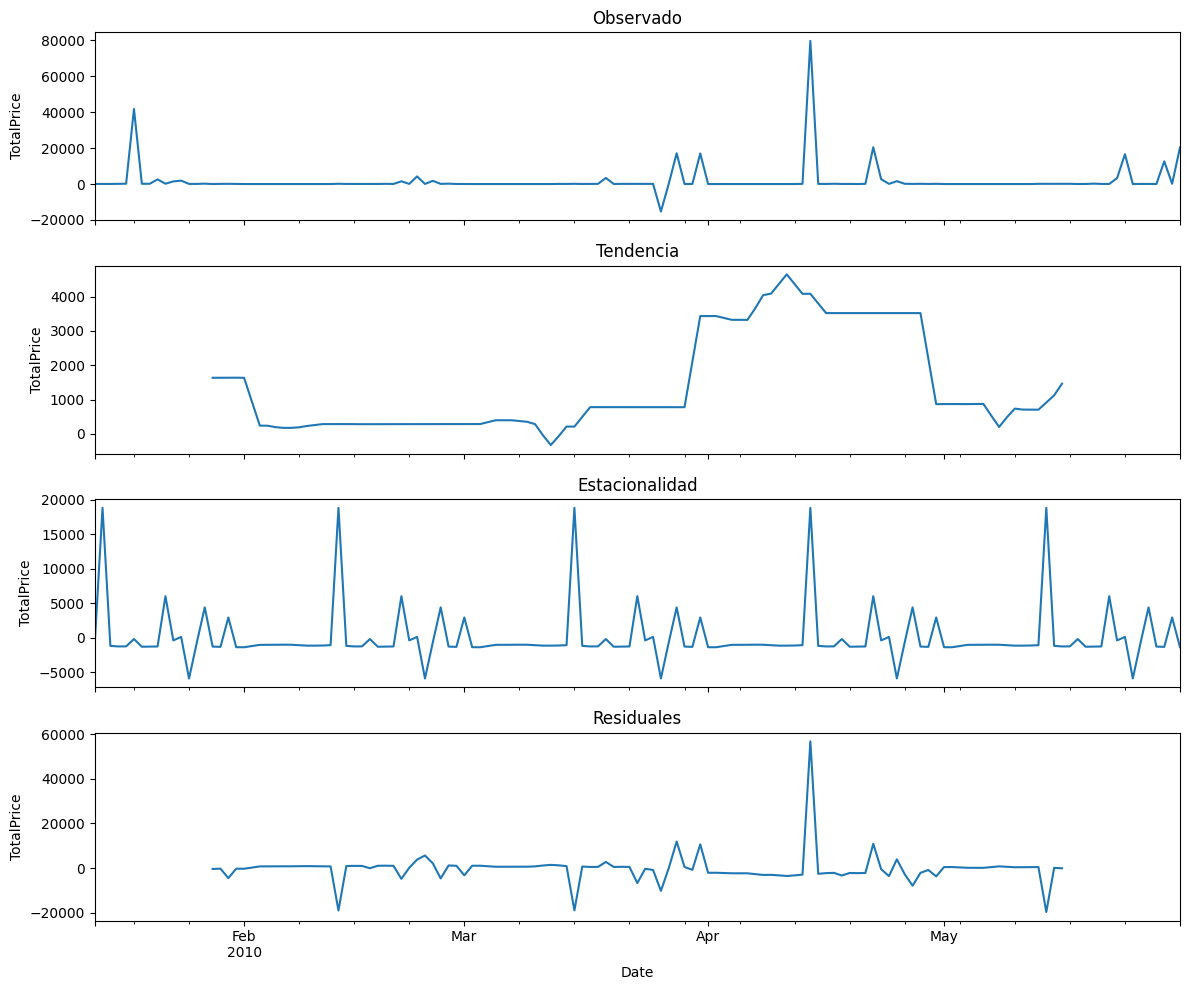

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_1 = pd.read_csv("Archivos/retail2.csv")

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1 = df_1.sort_values('InvoiceDate')

# Reestableciendo el índice a 'InvoiceDate' para trabajar como serie temporal
df_1.set_index('InvoiceDate', inplace=True)

# Obtener una serie diaria (D)
df_daily = df_1['TotalPrice'].resample('D').sum()

# Descomponer la serie temporal
decomposicion = seasonal_decompose(df_daily, model='additive', period=30)  

# Graficando la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomposicion.observed.plot(ax=ax1, title='Observado')
ax1.set_ylabel('TotalPrice')

decomposicion.trend.plot(ax=ax2, title='Tendencia')
ax2.set_ylabel('TotalPrice')

decomposicion.seasonal.plot(ax=ax3, title='Estacionalidad')
ax3.set_ylabel('TotalPrice')

decomposicion.resid.plot(ax=ax4, title='Residuales')
ax4.set_ylabel('TotalPrice')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()


## Pregunta 38
**Interpolación de datos faltantes:**
- Interpole los valores faltantes en la columna `TotalPrice` utilizando la interpolación lineal.

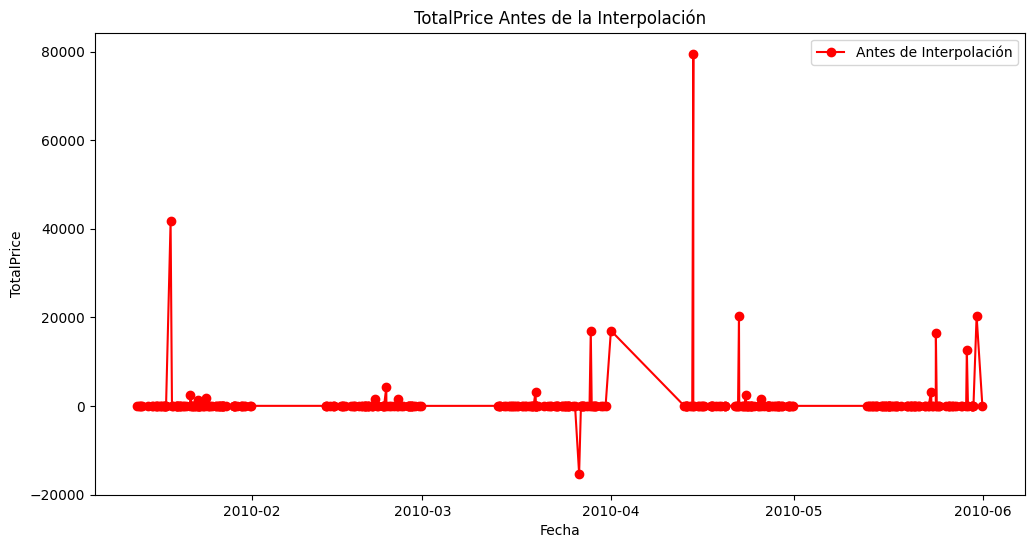

Interpolación lineal de los valores faltantes en 'TotalPrice'
                     TotalPrice
InvoiceDate                    
2010-01-13 03:19:16       11.10
2010-01-13 10:55:34        0.00
2010-01-13 16:29:07       14.85
2010-01-13 18:45:19       33.90
2010-01-14 00:42:39       15.00
2010-01-14 21:49:15       14.85
2010-01-15 16:14:57       12.50
2010-01-15 17:55:03       33.90
2010-01-16 06:11:39       16.50
2010-01-16 06:50:00       33.90
2010-01-16 10:34:59       19.80
2010-01-16 16:05:13       12.60
2010-01-16 23:30:16       15.30
2010-01-17 02:11:34       41.70
2010-01-17 06:28:29        9.90


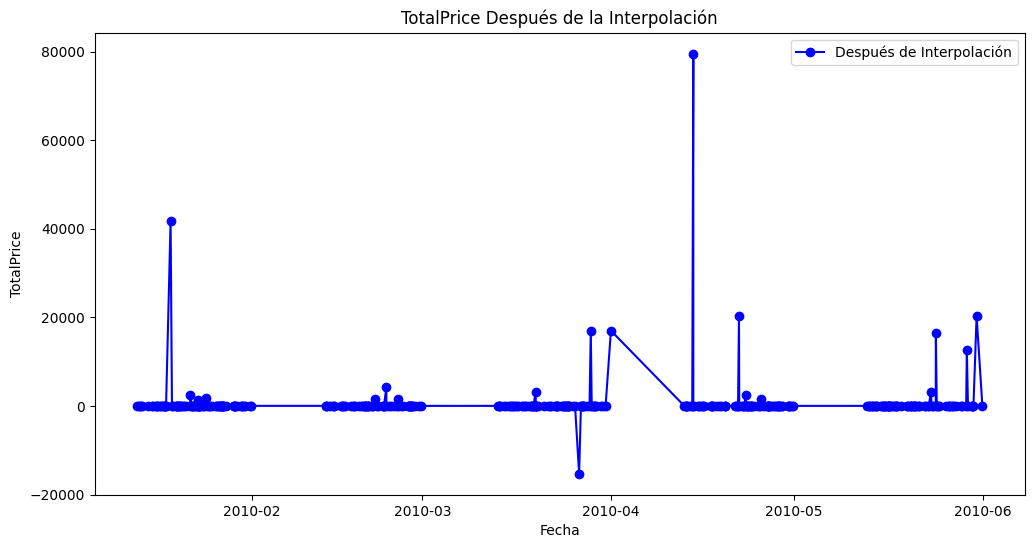

In [236]:
import pandas as pd
import numpy as np


df_1 = pd.read_csv("Archivos/retail2.csv")

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice'] 

df_1 = df_1.sort_values('InvoiceDate')

df_1.set_index('InvoiceDate', inplace=True)

# Graficar antes de la interpolación
plt.figure(figsize=(12, 6))
plt.plot(df_1.index, df_1['TotalPrice'], marker='o', color='red', label='Antes de Interpolación')
plt.title('TotalPrice Antes de la Interpolación')
plt.xlabel('Fecha')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()

# Interpolación lineal de los valores faltantes en 'TotalPrice'
df_1['TotalPrice'] = df_1['TotalPrice'].interpolate(method='linear')

print("Interpolación lineal de los valores faltantes en 'TotalPrice'")
print(df_1[['TotalPrice']].head(15))

# Graficar después de la interpolación
plt.figure(figsize=(12, 6))
plt.plot(df_1.index, df_1['TotalPrice'], marker='o', color='blue', label='Después de Interpolación')
plt.title('TotalPrice Después de la Interpolación')
plt.xlabel('Fecha')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()


## Pregunta 39
**Análisis de autocorrelación:**
- Realice un análisis de autocorrelación en la columna `TotalPrice` del dataset `retail`.

<Figure size 1000x600 with 0 Axes>

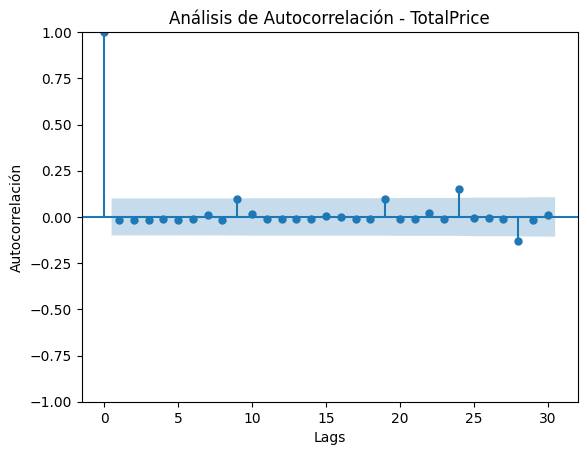

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df_1 = pd.read_csv("Archivos/retail2.csv")

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

df_1 = df_1.sort_values('InvoiceDate')

df_1.set_index('InvoiceDate', inplace=True)

# Interpolar valores faltantes en 'TotalPrice' para tener una serie continua
df_1['TotalPrice'] = df_1['TotalPrice'].interpolate(method='linear')

# Realizar el análisis de autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(df_1['TotalPrice'], lags=30)  
plt.title('Análisis de Autocorrelación - TotalPrice')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()


Podemo observar que el Punto `'r0'` es Estadisticamente significativo, que es obvio, dado que es la relacion de la serie de tiempo de `'TotalPrice'` 'sin retardo', ademas de dos puntos cerca de `lag='18'` y `lag='28'` aproximadamente.
 
El resto de los puntos caen dentro del intervalo de confianza al 95% (área sombreada) y muy cerca de cero, por lo que `'no son estadísticamente significativos'`, podemos decir, que tenemos una serie de tiempo con ruido, llamado `“Ruido Blanco”` que nos indica que no podemos crear un modelo lineal que sirva para predecir el futuro a partir de estos datos, se tendría que explorar entonces, técnica para generar 'Modelos No lineales'.

## Pregunta 40
**Conversión de zona horaria:**
- Convierta las fechas en la columna `InvoiceDate` a una zona horaria específica (por ejemplo, UTC) en el dataset `retail`.


In [239]:
import pandas as pd

df_1 = pd.read_csv("Archivos/retail2.csv")

# Convertir 'InvoiceDate' a datetime, asumiendo el formato 'dd/mm/yyyy HH:MM:SS'
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Asignando una zona horaria específica al datetime original
df_1['InvoiceDate'] = df_1['InvoiceDate'].dt.tz_localize('Europe/London', ambiguous='NaT', nonexistent='shift_forward')

# Convertiendo la zona horaria a UTC
df_1['InvoiceDate'] = df_1['InvoiceDate'].dt.tz_convert('UTC')

# Resultados
print(df_1[['InvoiceDate']].head())


                InvoiceDate
0 2010-02-14 12:09:15+00:00
1 2010-04-14 11:09:15+00:00
2 2010-05-16 14:59:40+00:00
3 2010-04-30 16:30:11+00:00
4 2010-04-22 09:07:49+00:00


# Parte 5 Preguntas de Negocio

## Pregunta 1
**Análisis de Retorno de Productos:**
    - ¿Cuál es el porcentaje de productos devueltos por país (United Kingdom, Germany, Denmark)? ¿Hay alguna diferencia     notable entre los países?

In [10]:
import pandas as pd
from scipy import stats

df_1 = pd.read_csv('Archivos/retail2.csv')

# Filtrando datos
paises_interes = ["United Kingdom", "Germany", "Denmark"]
df_filtrado = df_1[df_1['Country'].isin(paises_interes)]

# Filtrar los productos devueltos
productos_devueltos = df_filtrado[df_filtrado['ReturnStatus'] == 'Returned']

# Calcular la cantidad total de productos vendidos por país
total_por_pais = df_filtrado.groupby('Country')['Quantity'].sum()

# Calcular la cantidad de productos devueltos por país
devueltos_por_pais = productos_devueltos.groupby('Country')['Quantity'].sum()

# Calcular el porcentaje de productos devueltos por país
porcentaje_devueltos_por_pais = (devueltos_por_pais / total_por_pais) * 100

# Visualizar los porcentajes calculados
print("Porcentajes de productos devueltos por país:")
print(porcentaje_devueltos_por_pais.round(1).astype(str) + '%')

# Ahora, realizamos el análisis ANOVA sobre los datos individuales de devoluciones por país

# Creamos una columna que indique el porcentaje de devolución para cada transacción
df_filtrado['PorcentajeDevolucion'] = (df_filtrado['Quantity'] * (df_filtrado['ReturnStatus'] == 'Returned').astype(int)) / df_filtrado['Quantity'] * 100

# Separar los datos por país
uk = df_filtrado[df_filtrado['Country'] == 'United Kingdom']['PorcentajeDevolucion'].dropna()
germany = df_filtrado[df_filtrado['Country'] == 'Germany']['PorcentajeDevolucion'].dropna()
denmark = df_filtrado[df_filtrado['Country'] == 'Denmark']['PorcentajeDevolucion'].dropna()

# Realizar el test ANOVA
f_statistic, p_value = stats.f_oneway(uk, germany, denmark)

print(f'\nEstadístico F: {f_statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación de resultados
if p_value < 0.05:
    print("\nConclusión: Hay una diferencia significativa en el porcentaje de productos devueltos entre los países.")
else:
    print("\nConclusión: No hay una diferencia significativa en el porcentaje de productos devueltos entre los países.")


Porcentajes de productos devueltos por país:
Country
Denmark           41.6%
Germany           53.2%
United Kingdom    53.6%
Name: Quantity, dtype: object

Estadístico F: 1.1601
Valor p: 0.3146

Conclusión: No hay una diferencia significativa en el porcentaje de productos devueltos entre los países.


C:\Users\REY\AppData\Local\Temp\ipykernel_652\4111451989.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PorcentajeDevolucion'] = (df_filtrado['Quantity'] * (df_filtrado['ReturnStatus'] == 'Returned').astype(int)) / df_filtrado['Quantity'] * 100


Tanto `Germany` como `United Kingdom` difieren un poco en sus porcientos de `Denmark`, pero haciendo el `Test estadistico de ANOVA`, vemos que `p = 0.3146 => 'p > 0.05'` lo cual indica que no se rechaza la Hipotesis la 'Ho', concluyendo que no hay evidencia suficiente para afirmar que haya diferencias significativas en los porcentajes de devolución entre los paises de estudio.

## Pregunta 2
**Impacto de Promociones:**
- ¿Qué porcentaje de las ventas totales se realizaron utilizando códigos de promoción en cada uno de los tres países? ¿Cuál es el código de promoción más efectivo?

In [306]:
import pandas as pd

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

# Filtrando paises de interés
df_filtrado = df_1[df_1['Country'].isin(['Denmark', 'Germany', 'United Kingdom'])]

# Filtrar las ventas con códigos de promoción aplicados
df_promo = df_filtrado[df_filtrado['PromotionCode'].notna()]

# Calculando el porcentaje de ventas con códigos de promoción para cada país
porc_ventas_promo = df_promo.groupby('Country')['TotalPrice'].sum() / df_filtrado.groupby('Country')['TotalPrice'].sum() * 100

# Calcular el código de promoción más efectivo basado en las ventas totales
promo_mas_efectivo = df_promo.groupby('PromotionCode')['TotalPrice'].sum().idxmax()

# Filtrar solo las ventas del código de promoción más efectivo
filtrado_df = df_promo[df_promo['PromotionCode'] == promo_mas_efectivo]

# Calcular el país donde se generaron más ventas con el código de promoción más efectivo
pais_cod_masEfectivo = filtrado_df.groupby('Country')['TotalPrice'].sum().idxmax()

print("Porcentaje de ventas con códigos de promoción en cada país:")
print(porc_ventas_promo.round(1).astype(str) + '%')

print("\nEl código de promoción más efectivo es:", promo_mas_efectivo)
print("El país donde más ventas generó este código es:", pais_cod_masEfectivo)


Porcentaje de ventas con códigos de promoción en cada país:
Country
Denmark           95.4%
Germany           96.4%
United Kingdom    96.9%
Name: TotalPrice, dtype: object

El código de promoción más efectivo es: SALE15
El país donde más ventas generó este código es: United Kingdom


## Pregunta 3
**Canales de Venta:**
- ¿Cuál es la distribución de ventas entre los diferentes canales de venta (`SaleChannel`) en cada país? ¿Hay un canal que sea predominantemente más utilizado en alguno de los países?

Países únicos en el dataset:
['United Kingdom' 'Germany' 'England' 'Denmark']

Distribución de ventas por canal y país:
SaleChannel     In-Store  Online
Country                         
Denmark               66      63
England                2       3
Germany               61      62
United Kingdom        68      57


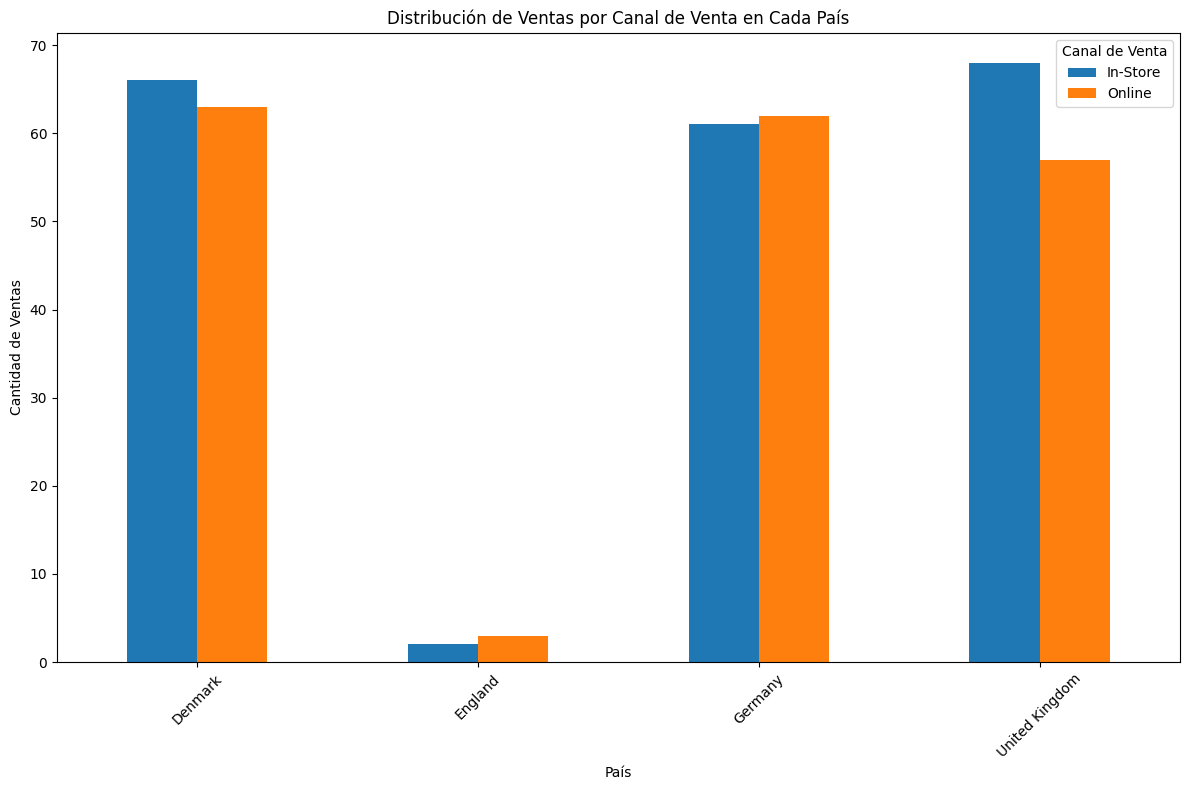

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (asegúrate de que la ruta sea correcta)
df_1 = pd.read_csv("Archivos/retail2.csv")

# Verificar los nombres únicos de los países en el dataset
print("Países únicos en el dataset:")
print(df_1['Country'].unique())

# Agrupar los datos por país y canal de venta, y contar la cantidad de ventas
sales_distribution = df_1.groupby(['Country', 'SaleChannel']).size().unstack().fillna(0)

# Mostrar la tabla con los resultados
print("\nDistribución de ventas por canal y país:")
print(sales_distribution)

# Configurar el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(12, 8))
sales_distribution.plot(kind='bar', ax=ax)

# Configurar título y etiquetas
plt.title('Distribución de Ventas por Canal de Venta en Cada País')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('País')
plt.legend(title='Canal de Venta')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Podemos observar tanto en la tabla de resultado como en el gráfico que el canal "In-Store" es el más utilizado en el reino Unido (United Kingdom) con un porciento un valor de 68. 

## Pregunta 4
**Costos de Envío:**
- ¿Cuál es el costo promedio de envío por país? ¿Existen diferencias significativas en los costos de envío entre los tres países?

Costo promedio de envío por país:
Country
Denmark           12.653178
England           10.656000
Germany           12.761870
United Kingdom    12.330960
Name: ShippingCost, dtype: float64

Resultados de la prueba ANOVA:
Estadístico F: 0.544
Valor p: 0.653


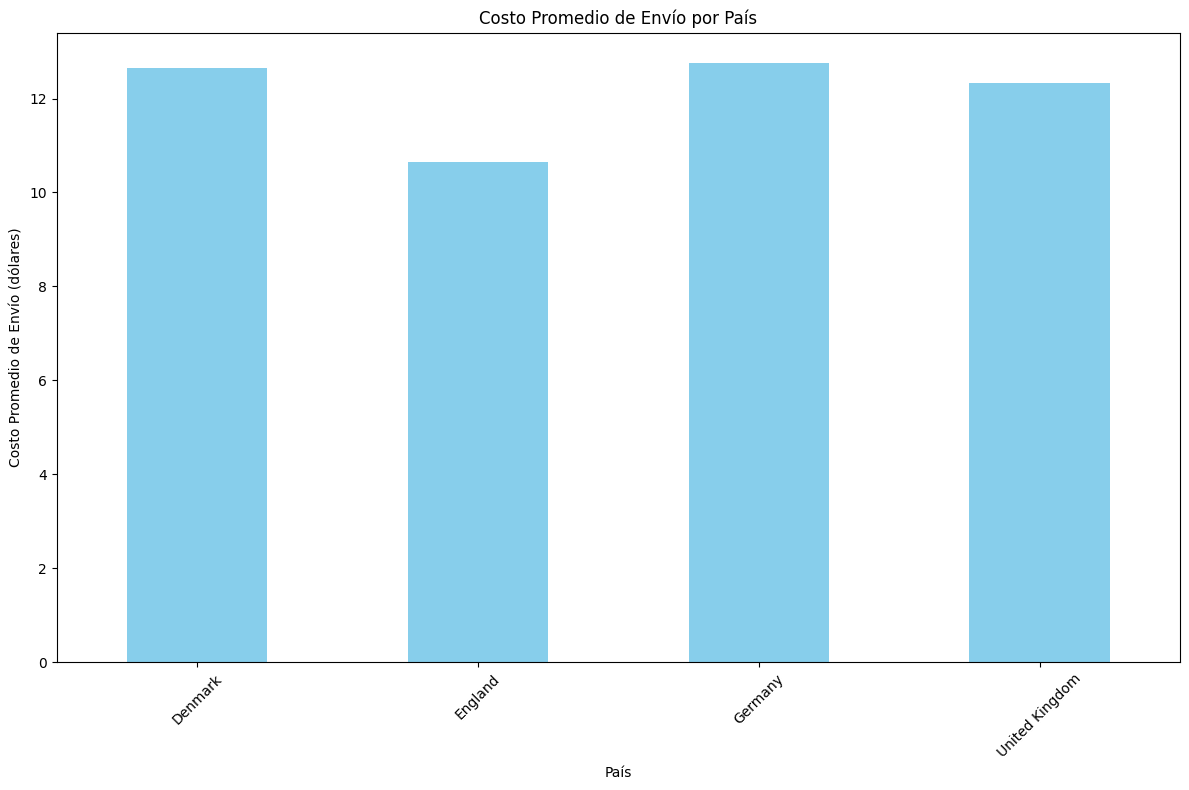


No hay diferencias significativas en los costos de envío entre los países.
La probabilidad 'p' es mayor de 0.05, por tanto, 'No se rechaza la Hipotesis Nula Ho'
donde se asevera que los valores medios de los costos de envios son iguales.


In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar los datos
df_1 = pd.read_csv("Archivos/retail2.csv")

# Calcular el costo promedio de envío por país
average_shipping_cost = df_1.groupby('Country')['ShippingCost'].mean()

# Mostrar la tabla con el costo promedio de envío por país
print("Costo promedio de envío por país:")
print(average_shipping_cost)

# Preparar los datos para la prueba ANOVA
# Obtener todos los países presentes en el DataFrame
countries = df_1['Country'].unique()
data_for_anova = [df_1[df_1['Country'] == country]['ShippingCost'].dropna() for country in countries]

# Realizar la prueba ANOVA para verificar si hay diferencias significativas
f_statistic, p_value = stats.f_oneway(*data_for_anova)

# Mostrar los resultados de la prueba ANOVA
print("\nResultados de la prueba ANOVA:")
print(f"Estadístico F: {f_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

# Graficar el costo promedio de envío por país
fig, ax = plt.subplots(figsize=(12, 8))
average_shipping_cost.plot(kind='bar', ax=ax, color='skyblue')

# Configurar título y etiquetas
plt.title('Costo Promedio de Envío por País')
plt.ylabel('Costo Promedio de Envío (dólares)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Determinar si las diferencias son significativas
alpha = 0.05
if p_value < alpha:
    print("\nHay diferencias significativas en los costos de envío entre los países.")
else:
    print("\nNo hay diferencias significativas en los costos de envío entre los países.\nLa probabilidad 'p' es mayor de 0.05, por tanto, 'No se rechaza la Hipotesis Nula Ho'\ndonde se asevera que los valores medios de los costos de envios son iguales.")


## Pregunta 5
**Peso del Producto y Costos de Envío:**
- ¿Existe una correlación entre el peso del producto (`ProductWeight`) y el costo de envío (`ShippingCost`)? ¿Cómo varía esta relación entre los diferentes países?

In [174]:
# Cálculo de la correlación global entre ProductWeight y ShippingCost
correlacion = df_1[['ProductWeight', 'ShippingCost']].corr().iloc[0, 1]

print(f"Correlación global entre 'Peso' y 'Costo de Envío': {correlacion:.2f}")

# Cálculo de la correlación entre 'ProductWeight' y 'ShippingCost' por país
correlacion_paises = df_1.groupby('Country')[['ProductWeight', 'ShippingCost']].corr().unstack().iloc[:, 1].reset_index()
correlacion_paises = correlacion_paises.rename(columns={'Country':'País',0: 'Correlacion','ProductWeight': 'Peso', 'ShippingCost':'Costo_Envío'})

# Visualización del resultado
print(correlacion_paises)


Correlación global entre 'Peso' y 'Costo de Envío': 0.03
             País        Peso
                  Costo_Envío
0         Denmark   -0.012928
1         England    0.561916
2         Germany   -0.017582
3  United Kingdom    0.085763


Se puede destacar en `England` una correlación de `0.561916`, que podria indicar una relación más fuerte entre el peso y el costo de envío en comparación con otros países; todo lo contrario a `Denmark`, donde prácticamente no hay relación entre el peso y costo de envío, puede verse un valor muy bajo de `-0.012928`

## Pregunta 6
**Descuentos y Comportamiento de Compra:**
- ¿Qué porcentaje de las compras en cada país se realizaron con algún tipo de descuento (`Discount`)? ¿Los clientes en algún país en particular son más propensos a utilizar descuentos?

In [175]:
# Creación de una columna para identificar si la compra tiene descuento
df_1['HasDiscount'] = df_1['Discount'] > 0

# Cálculo del porcentaje de compras con descuento por país
porciento_descuento_por_pais = df_1.groupby('Country')['HasDiscount'].mean().reset_index()

# Convertir los valores a porcentaje
porciento_descuento_por_pais['HasDiscount'] = porciento_descuento_por_pais['HasDiscount'] * 100

# Renombrar la columna para mayor claridad
porciento_descuento_por_pais = porciento_descuento_por_pais.rename(columns={'Country':'País','HasDiscount': 'porciento_descuento'})

# Visualización del resultado
print(porciento_descuento_por_pais)


             País  porciento_descuento
0         Denmark                100.0
1         England                100.0
2         Germany                100.0
3  United Kingdom                100.0


Todas las compras se realizaron con descuentos

## Pregunta 7
**Análisis de Categorías de Productos:**
- ¿Cuáles son las categorías de productos (`Category`) más vendidas en cada país? ¿Existen diferencias en las preferencias de categorías de productos entre los países?

Categorías más vendidas por país:
           Country    Category  Quantity
0          Denmark  Automotive       342
8          England  Automotive        25
11         Germany      Beauty       258
24  United Kingdom      Sports       325


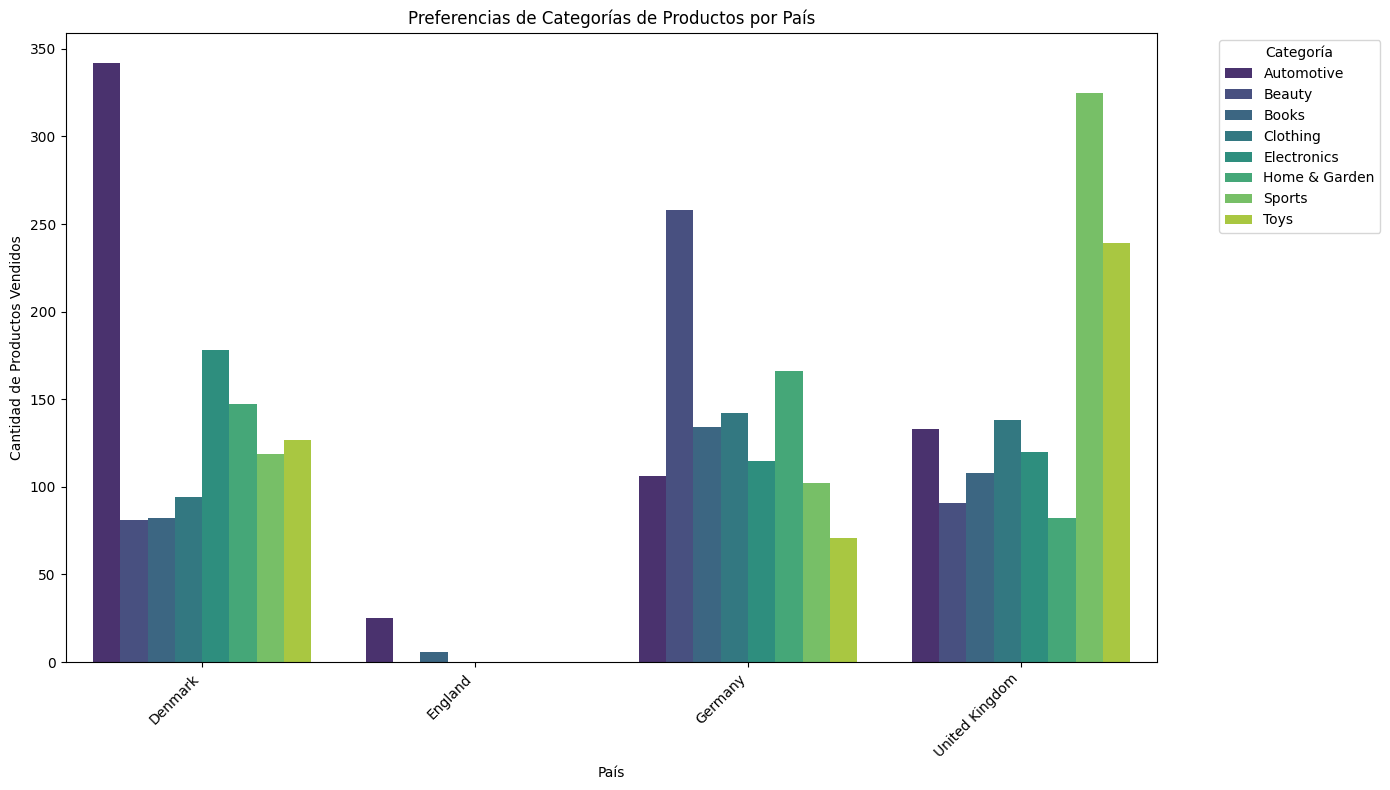

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV
df_1 = pd.read_csv('Archivos/retail2.csv')

ventas_por_categoria = df_1.groupby(['Country', 'Category'])['Quantity'].sum().reset_index()

# Identificando las categorías más vendidas por país
categoria_mas_vendida = ventas_por_categoria.loc[ventas_por_categoria.groupby('Country')['Quantity'].idxmax()]

print("Categorías más vendidas por país:")
print(categoria_mas_vendida)

# Visualización de las preferencias de categorías por país
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Quantity', hue='Category', data=ventas_por_categoria, palette='viridis')
plt.title('Preferencias de Categorías de Productos por País')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Las preferencias de categorías de productos varían significativamente entre los países:

- 'Denmark' y 'England' comparten la categoría "Automotive" como la más vendida, pero la gran diferencia en las cantidades sugiere que, aunque la categoría es la misma, no es igualmente preferida.

- 'Germany' y 'United Kingdom' tienen preferencias completamente diferentes ("Beauty" y "Sports", respectivamente), mostrando que los intereses de los consumidores son distintos según la región.

Estas diferencias en preferencias pueden estar influenciadas por factores culturales, económicos y de mercado en cada país.

## Pregunta 8
**Rendimiento de Proveedores:**
- ¿Cuál es el proveedor (`Supplier`) con el mayor volumen de ventas en cada país? ¿Cómo se distribuyen las ventas entre los diferentes proveedores en cada uno de los países?

Proveedores con el mayor volumen de ventas por país:
           Country    Supplier  Quantity
2          Denmark  Supplier C       344
5          England  Supplier A        15
9          Germany  Supplier B       283
17  United Kingdom  Supplier E       441


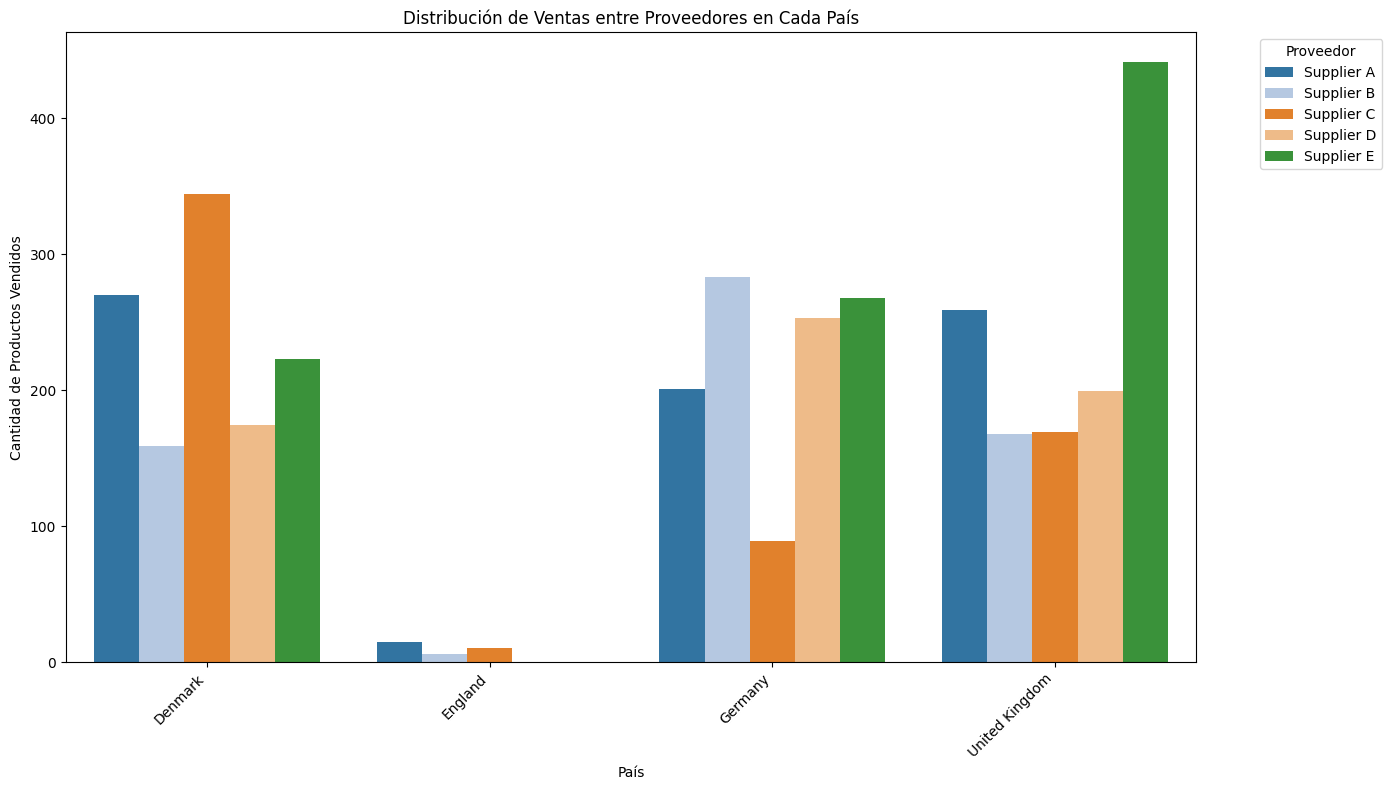

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

ventas_por_proveedor = df_1.groupby(['Country', 'Supplier'])['Quantity'].sum().reset_index()

# Identificar el proveedor con el mayor volumen de ventas en cada país
proveedor_mas_vendido = ventas_por_proveedor.loc[ventas_por_proveedor.groupby('Country')['Quantity'].idxmax()]

print("Proveedores con el mayor volumen de ventas por país:")
print(proveedor_mas_vendido)

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Quantity', hue='Supplier', data=ventas_por_proveedor, palette='tab20')
plt.title('Distribución de Ventas entre Proveedores en Cada País')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Proveedor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


En `Denmark`: El proveedor más importante es `Supplier C`, con 344 productos vendidos.

`England`: Aquí, `Supplier A` tiene el mayor volumen de ventas, pero con solo 15 productos vendidos. Este valor tan bajo indica que las ventas están muy fragmentadas o que el volumen de ventas en general es bajo en este país.

`Germany`: En `Alemania`, `Supplier B` lidera con 283 productos vendidos. 

`United Kingdom`: `Supplier E` domina el mercado en el Reino Unido con 441 productos vendidos.

## Pregunta 9
**Promedio de Precios de Venta:**
- ¿Cuál es el precio promedio de venta (`UnitPrice`) de los productos en cada país? ¿Existen diferencias significativas en los precios de venta entre los tres países?

Precio promedio de venta por país:
          Country  UnitPrice
0         Denmark      18.92
1         England       3.14
2         Germany      32.41
3  United Kingdom      20.35


C:\Users\REY\AppData\Local\Temp\ipykernel_652\2984883385.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='UnitPrice', data=precio_promedio_por_pais, palette='viridis')


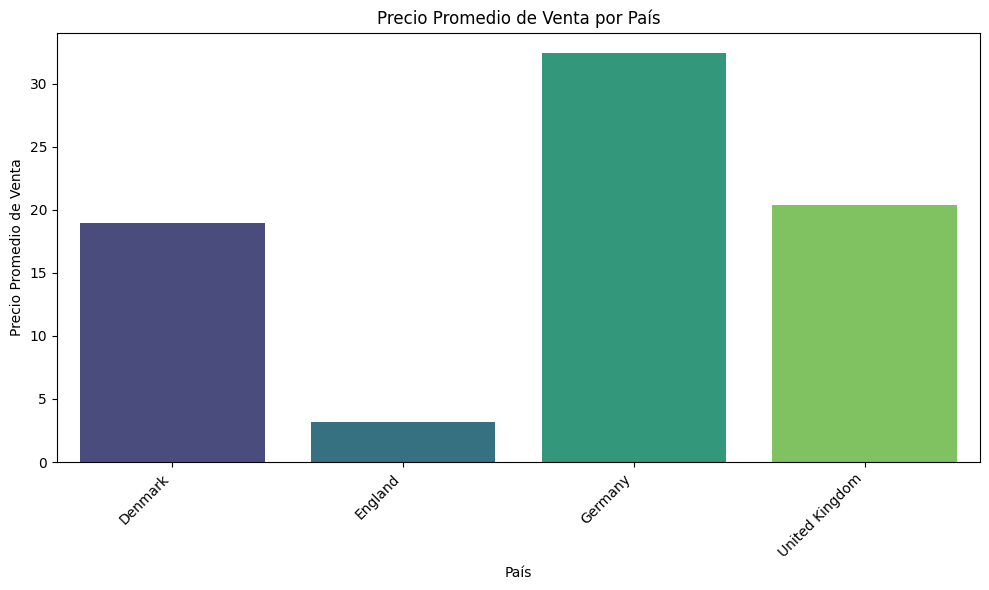


PRUEBA ESTADISTICA
Valor F de ANOVA: 0.4885329605872984
Valor p de ANOVA: 0.6904418609234719
No existe diferencias significativas en los precios promedio de venta entre los países.


In [19]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

# Calcular el precio promedio de venta por país
precio_promedio_por_pais = df_1.groupby('Country')['UnitPrice'].mean().reset_index()

print("Precio promedio de venta por país:")
print(precio_promedio_por_pais.round(2))

# Visualizar el precio promedio de venta por país
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='UnitPrice', data=precio_promedio_por_pais, palette='viridis')
plt.title('Precio Promedio de Venta por País')
plt.ylabel('Precio Promedio de Venta')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nPRUEBA ESTADISTICA")

# Preparando datos para el Test de ANOVA
paises = precio_promedio_por_pais['Country'].unique()
data = [df_1[df_1['Country'] == pais]['UnitPrice'].dropna() for pais in paises]

# Realizar prueba ANOVA
f_valor, p_valor = stats.f_oneway(*data)

print(f"Valor F de ANOVA: {f_valor}")
print(f"Valor p de ANOVA: {p_valor}")

# Interpretación del valor p

if p_valor < 0.05:
    print("Hay diferencias significativas en los precios promedio de venta entre los países.")
else:
    print("No existe diferencias significativas en los precios promedio de venta entre los países.")


## Pregunta 10
**Tendencias de Venta por Región:**
- ¿Cómo se distribuyen las ventas (`TotalPrice`) por región de ventas (`SalesRegion`) dentro de cada país? ¿Hay alguna región que destaque en términos de volumen de ventas en alguno de los países?

Total de ventas por región de ventas y país:
           Country    SalesRegion  TotalPrice
0          Denmark           Asia       409.4
1          Denmark      Australia     17569.3
2          Denmark         Europe      3184.0
3          Denmark  North America     42201.8
4          Denmark  South America      3807.6
5          England           Asia        15.3
6          England      Australia        12.5
7          England  North America        35.6
8          England  South America        17.8
9          Germany           Asia      4985.5
10         Germany      Australia     24797.3
11         Germany         Europe       580.4
12         Germany  North America       502.7
13         Germany  South America     18501.2
14  United Kingdom           Asia     79763.8
15  United Kingdom      Australia     39706.4
16  United Kingdom         Europe      3633.3
17  United Kingdom  North America       499.9
18  United Kingdom  South America       552.8


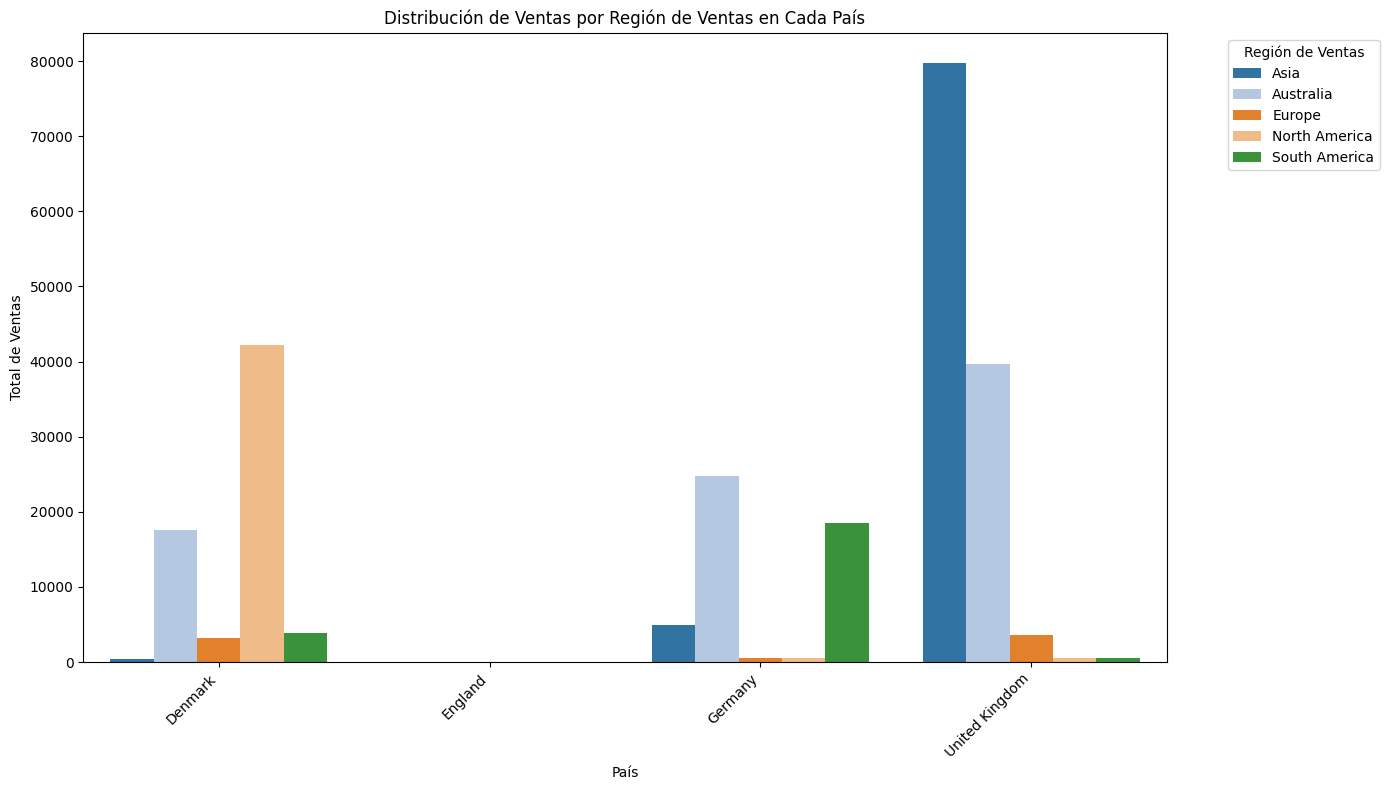


En Denmark, la región con el mayor volumen de ventas es North America con un total de 42201.76.

En England, la región con el mayor volumen de ventas es North America con un total de 35.64.

En Germany, la región con el mayor volumen de ventas es Australia con un total de 24797.29.

En United Kingdom, la región con el mayor volumen de ventas es Asia con un total de 79763.85.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['TotalPrice'] = df_1['UnitPrice'] * df_1['Quantity']

# Agrupar por país y región de ventas, y calcular el total de ventas
ventas_por_region = df_1.groupby(['Country', 'SalesRegion'])['TotalPrice'].sum().reset_index()

print("Total de ventas por región de ventas y país:")
print(ventas_por_region.round(1))

# Visualizar la distribución de ventas por región en cada país
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='TotalPrice', hue='SalesRegion', data=ventas_por_region, palette='tab20')
plt.title('Distribución de Ventas por Región de Ventas en Cada País')
plt.ylabel('Total de Ventas')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región de Ventas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Identificar las regiones que destacan en cada país
for country in ventas_por_region['Country'].unique():
    pais_data = ventas_por_region[ventas_por_region['Country'] == country]
    max_region = pais_data.loc[pais_data['TotalPrice'].idxmax()]
    print(f"\nEn {country}, la región con el mayor volumen de ventas es {max_region['SalesRegion']} con un total de {max_region['TotalPrice']:.2f}.")


## Pregunta 11
**Análisis de Frecuencia de Compras:**
- ¿Cuál es la frecuencia promedio de compras por cliente (`CustomerID`) en cada país? ¿Los clientes en algún país compran con mayor frecuencia?

C:\Users\REY\AppData\Local\Temp\ipykernel_652\659706693.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')
C:\Users\REY\AppData\Local\Temp\ipykernel_652\659706693.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='FrecuenciaCompras', data=frecuencia_promedio_por_pais, palette='viridis')


Frecuencia promedio de compras por cliente en cada país:
          Country  FrecuenciaCompras
0         Denmark           0.984496
1         England           1.000000
2         Germany           0.967480
3  United Kingdom           1.000000


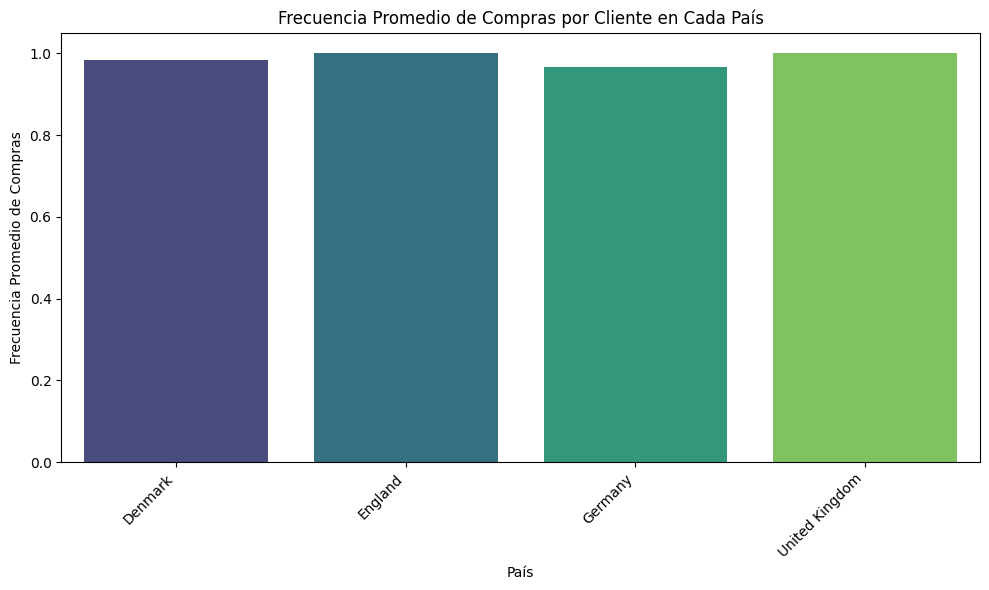


El país con la mayor frecuencia promedio de compras por cliente es England con una frecuencia de 1.00.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

# Contar el número de compras por cliente en cada país
frec_compras_por_cliente = df_1.groupby(['Country', 'CustomerID'])['InvoiceDate'].count().reset_index()
frec_compras_por_cliente.rename(columns={'InvoiceDate': 'FrecuenciaCompras'}, inplace=True)

# Calcular la frecuencia promedio de compras por cliente en cada país
frec_promedio_por_pais = frec_compras_por_cliente.groupby('Country')['FrecuenciaCompras'].mean().reset_index()

print("Frecuencia promedio de compras por cliente en cada país:")
print(frec_promedio_por_pais)

# Visualizando resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='FrecuenciaCompras', data=frec_promedio_por_pais, palette='viridis')
plt.title('Frecuencia Promedio de Compras por Cliente en Cada País')
plt.ylabel('Frecuencia Promedio de Compras')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar el país con mayor frecuencia promedio de compras
pais_max_frecuencia = frec_promedio_por_pais.loc[frec_promedio_por_pais['FrecuenciaCompras'].idxmax()]
print(f"\nEl país con la mayor frecuencia promedio de compras por cliente es {pais_max_frecuencia['Country']} con una frecuencia de {pais_max_frecuencia['FrecuenciaCompras']:.2f}.")



Aunque esta frecuencia es muy similar al resto de los paises estudiados, todos cerca de '1'

## Pregunta 12
**Valor de Vida del Cliente:**
- ¿Cuál es el valor promedio de vida del cliente (suma de `TotalPrice`) en cada país? ¿Existe una diferencia significativa en el valor de vida del cliente entre los tres países (Denmark, United Kingdom, Germany?

Valor promedio de vida del cliente en cada país:
          Country  ValorVidaCliente
0         Denmark             520.7
1         Germany             401.4
2  United Kingdom            1001.3


C:\Users\REY\AppData\Local\Temp\ipykernel_652\3714036338.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='ValorVidaCliente', data=valor_promedio_por_pais, palette='viridis')


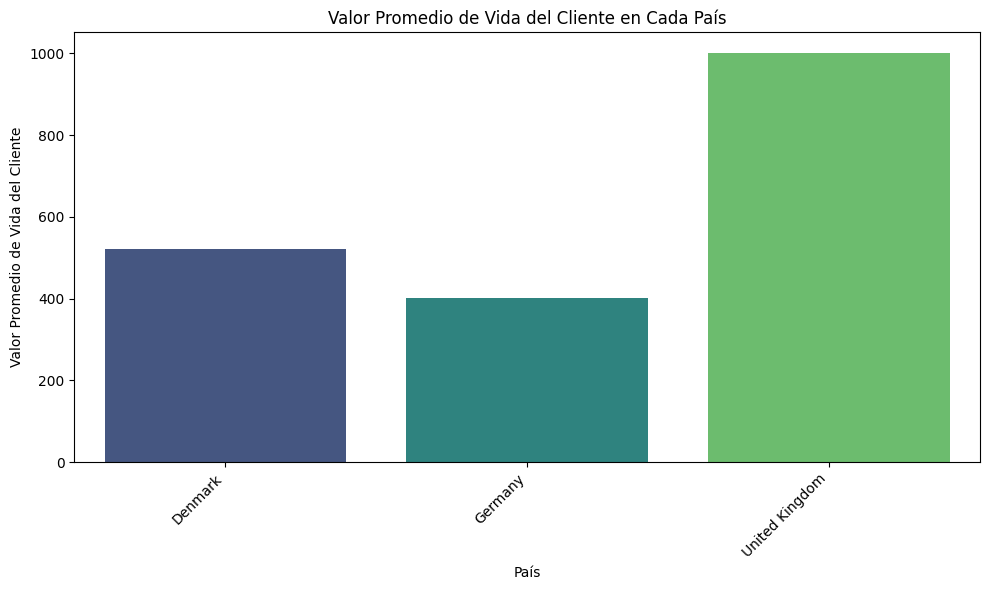

Valor F de ANOVA: 0.46606360604413555
Valor p de ANOVA: 0.627832273995691
No hay diferencias significativas en el valor de vida del cliente entre los países seleccionados.


In [25]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['TotalPrice'] = df_1['UnitPrice'] * df_1['Quantity']

paises_seleccionados = ['Denmark', 'United Kingdom', 'Germany']
df_filtrado = df_1[df_1['Country'].isin(paises_seleccionados)]

# Calcular el valor total de vida del cliente por cliente y país
valor_vida_cliente = df_filtrado.groupby(['Country', 'CustomerID'])['TotalPrice'].sum().reset_index()
valor_vida_cliente.rename(columns={'TotalPrice': 'ValorVidaCliente'}, inplace=True)

# Calcular el valor promedio de vida del cliente en cada país
valor_promedio_por_pais = valor_vida_cliente.groupby('Country')['ValorVidaCliente'].mean().reset_index()

print("Valor promedio de vida del cliente en cada país:")
print(valor_promedio_por_pais.round(1))

# Visualizar el valor promedio de vida del cliente en cada país
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='ValorVidaCliente', data=valor_promedio_por_pais, palette='viridis')
plt.title('Valor Promedio de Vida del Cliente en Cada País')
plt.ylabel('Valor Promedio de Vida del Cliente')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# PRUEBA ESTADISTICA ANOVA PARA DETERMINAR DIFERENCIAS SIGNIFICATIVAS ENTRE GRUPOS
data = [valor_vida_cliente[valor_vida_cliente['Country'] == pais]['ValorVidaCliente'] for pais in paises_seleccionados]

f_valor, p_valor = stats.f_oneway(*data)

print(f"Valor F de ANOVA: {f_valor}")
print(f"Valor p de ANOVA: {p_valor}")

# Interpretación del valor p
if p_valor < 0.05:
    print("Hay diferencias significativas en el valor de vida del cliente entre los países seleccionados.")
else:
    print("No hay diferencias significativas en el valor de vida del cliente entre los países seleccionados.")


## Pregunta 13
**Métodos de Pago:**
- ¿Cuál es el método de pago (`PaymentMethod`) más utilizado en cada país? ¿Hay una preferencia notable por ciertos métodos de pago en algún país específico?

Método de pago más utilizado en cada país:
           Country  PaymentMethod  Frecuencia
1          Denmark           Cash          32
8          England         PayPal           2
11         Germany    Credit Card          31
14  United Kingdom  Bank Transfer          33


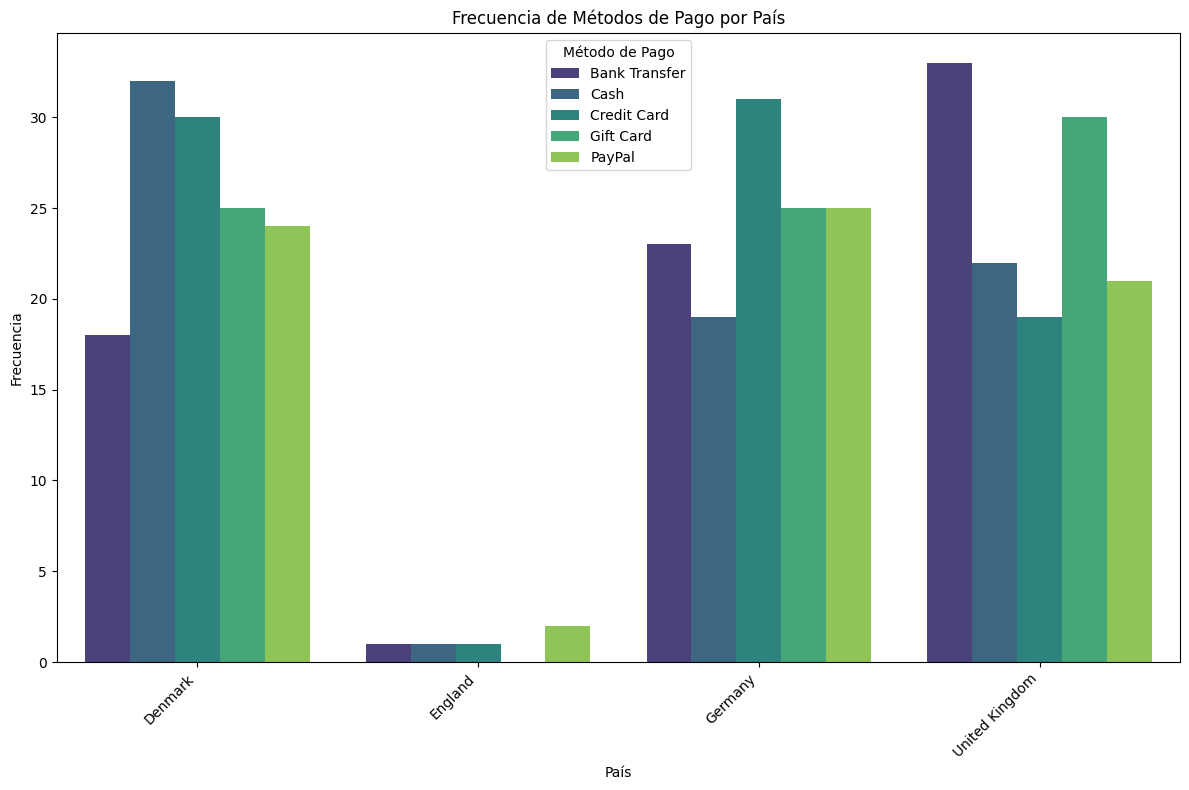

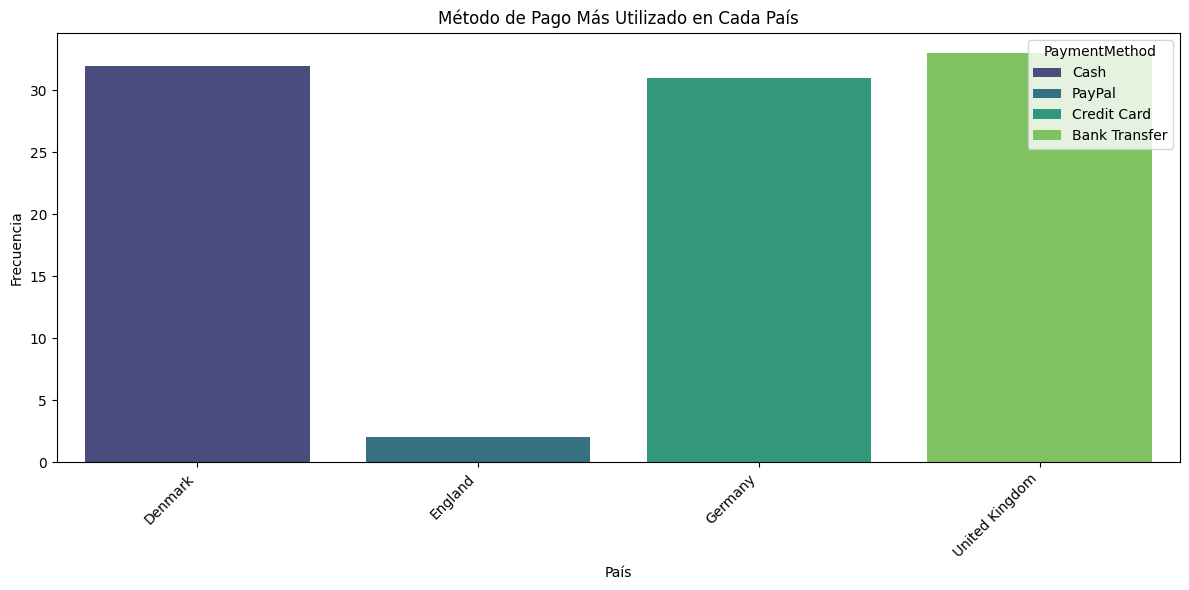

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

# Contar la frecuencia de uso de cada método de pago en cada país
metodo_pago_frecuencia = df_1.groupby(['Country', 'PaymentMethod']).size().reset_index(name='Frecuencia')

# Encontrar el método de pago más utilizado en cada país
metodo_pago_mas_usado = metodo_pago_frecuencia.loc[metodo_pago_frecuencia.groupby('Country')['Frecuencia'].idxmax()]

print("Método de pago más utilizado en cada país:")
print(metodo_pago_mas_usado)

# Visualizar la frecuencia de métodos de pago por país
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Frecuencia', hue='PaymentMethod', data=metodo_pago_frecuencia, palette='viridis')
plt.title('Frecuencia de Métodos de Pago por País')
plt.ylabel('Frecuencia')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método de Pago')
plt.tight_layout()
plt.show()

# Visualizar el método de pago más utilizado en cada país
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Frecuencia', data=metodo_pago_mas_usado, hue='PaymentMethod', palette='viridis')
plt.title('Método de Pago Más Utilizado en Cada País')
plt.ylabel('Frecuencia')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- `Dinamarca` muestra una preferencia notable por el 'efectivo', lo que podría indicar una cultura que valora los métodos de pago tradicionales o una infraestructura menos avanzada para pagos electrónicos.

- `Inglaterra` tiene una baja frecuencia de uso de 'PayPal', lo que sugiere que este método no es muy popular a pesar de ser el más utilizado en su categoría.

- `Alemania` muestra una preferencia con 'tarjetas de crédito' 

- `Reino Unido` tiene preferencia con las 'transferencias bancarias'


## Pregunta 14
**Evaluación de la Eficiencia de Descuentos:**
- ¿Qué impacto tienen los descuentos (`Discount`) en el valor total de las ventas en cada país? ¿Los descuentos resultan en un aumento significativo en el volumen de ventas?

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['TotalPrice'] = df_1['UnitPrice'] * df_1['Quantity']

# Calcular el valor total de ventas con y sin descuento
df_1['DescuentoTotalPrice'] = df_1['TotalPrice'] * (1 - df_1['Discount'] / 100)

# Agrupar por país y calcular el valor total de ventas con y sin descuento
ventas_totales = df_1.groupby('Country').agg({
    'TotalPrice': 'sum',
    'DescuentoTotalPrice': 'sum'
}).reset_index()

# Calculando el impacto de los descuentos
ventas_totales['ImpactoDescuento'] = ventas_totales['TotalPrice'] - ventas_totales['DescuentoTotalPrice']

print("Valor total de ventas con y sin descuento por país:")
print(ventas_totales.round(2))

print("\nPRUEBA DE 't' DE MUESTRAS RELACIONADAS")
# Preparar los datos para la prueba t de muestras relacionadas
data_sin_descuento = [df_1[df_1['Country'] == pais]['TotalPrice'] for pais in ventas_totales['Country']]
data_con_descuento = [df_1[df_1['Country'] == pais]['DescuentoTotalPrice'] for pais in ventas_totales['Country']]

# Realizar la prueba t para comparar el valor total de ventas antes y después del descuento en cada país
t_valores = []
p_valores = []

for i, pais in enumerate(ventas_totales['Country']):
    t_valor, p_valor = stats.ttest_rel(data_sin_descuento[i], data_con_descuento[i])
    t_valores.append(t_valor)
    p_valores.append(p_valor)

# Mostrar los resultados de la prueba t
for i, pais in enumerate(ventas_totales['Country']):
    print(f"\nPara el país {pais}:")
    print(f"Valor t: {t_valores[i]}")
    print(f"Valor p: {p_valores[i]}")

    if p_valores[i] < 0.05:
        print("Los descuentos resultan en una diferencia significativa en el valor total de ventas.")
    else:
        print("No hay una diferencia significativa en el valor total de ventas debido a los descuentos.")


Valor total de ventas con y sin descuento por país:
          Country  TotalPrice  DescuentoTotalPrice  ImpactoDescuento
0         Denmark    67172.06             62974.91           4197.15
1         England       81.29                49.57             31.72
2         Germany    49367.15             34519.79          14847.36
3  United Kingdom   124156.29            110166.45          13989.84

PRUEBA DE 't' DE MUESTRAS RELACIONADAS

Para el país Denmark:
Valor t: 1.5360718542467422
Valor p: 0.12698898639702738
No hay una diferencia significativa en el valor total de ventas debido a los descuentos.

Para el país England:
Valor t: 5.452011374956545
Valor p: 0.005499173572352927
Los descuentos resultan en una diferencia significativa en el valor total de ventas.

Para el país Germany:
Valor t: 1.895628262810711
Valor p: 0.06037499266314056
No hay una diferencia significativa en el valor total de ventas debido a los descuentos.

Para el país United Kingdom:
Valor t: 1.7267918739802763
Val

En el analisis estadistico se puede observar que hay un 'impacto' significativo en los 'descuento' del valor total de las ventas en `Inglaterra`, no asi en el resto de los paises de la Base de Datos.

## Pregunta 15
**Análisis de Clientes por Región:**
- ¿Cuál es la distribución de clientes (`CustomerID`) por región de ventas (`SalesRegion`) en cada país? ¿Hay regiones con una concentración notablemente mayor de clientes?

Distribución de clientes por región de ventas en cada país:
           Country    SalesRegion  NumeroClientes
0          Denmark           Asia              18
1          Denmark      Australia              26
2          Denmark         Europe              30
3          Denmark  North America              27
4          Denmark  South America              28
5          England           Asia               1
6          England      Australia               1
7          England  North America               2
8          England  South America               1
9          Germany           Asia              23
10         Germany      Australia              26
11         Germany         Europe              25
12         Germany  North America              20
13         Germany  South America              29
14  United Kingdom           Asia              16
15  United Kingdom      Australia              32
16  United Kingdom         Europe              24
17  United Kingdom  North America       

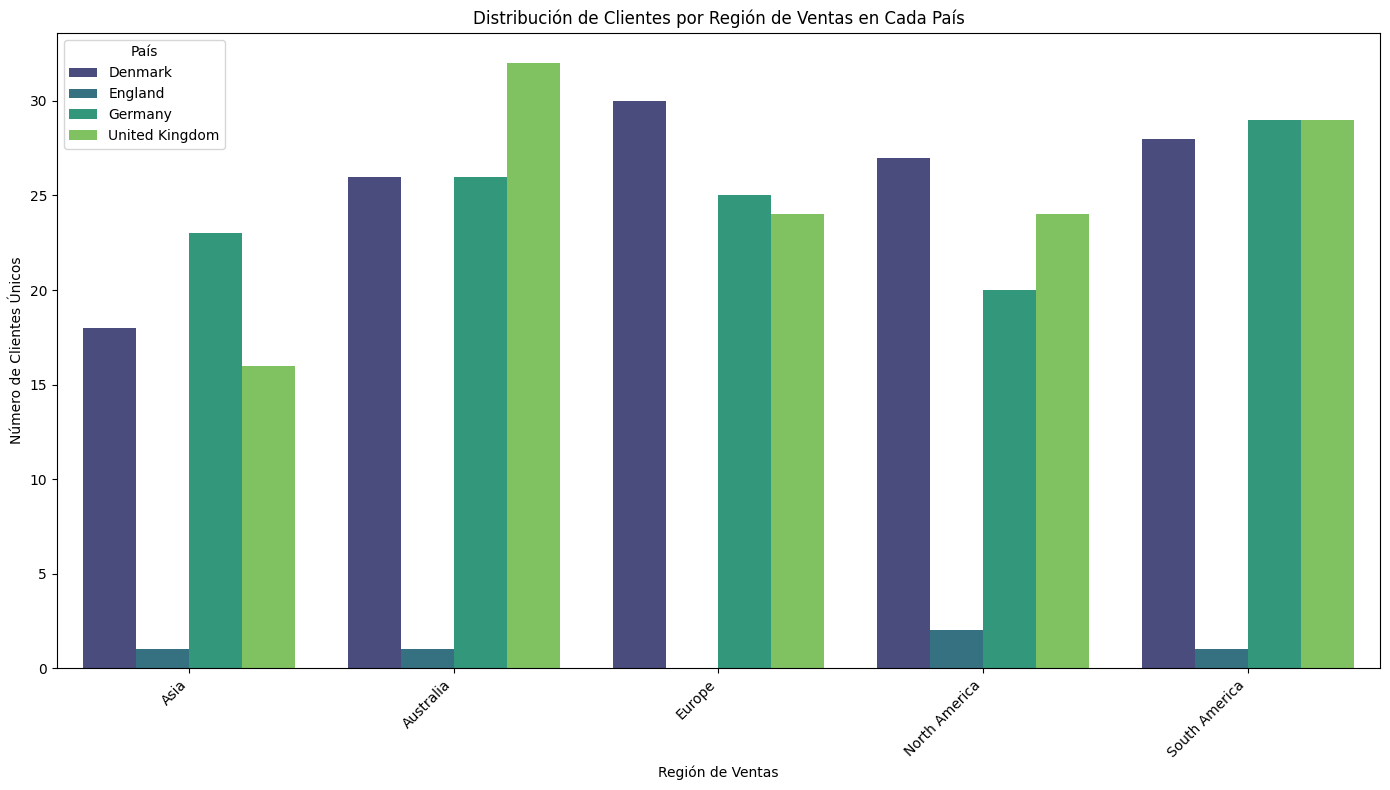

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

# Contar el número de clientes únicos por región de ventas en cada país
clientes_por_region = df_1.groupby(['Country', 'SalesRegion'])['CustomerID'].nunique().reset_index()
clientes_por_region.rename(columns={'CustomerID': 'NumeroClientes'}, inplace=True)

print("Distribución de clientes por región de ventas en cada país:")
print(clientes_por_region)

# Visualizar la distribución de clientes por región de ventas en cada país
plt.figure(figsize=(14, 8))
sns.barplot(x='SalesRegion', y='NumeroClientes', hue='Country', data=clientes_por_region, palette='viridis')
plt.title('Distribución de Clientes por Región de Ventas en Cada País')
plt.ylabel('Número de Clientes Únicos')
plt.xlabel('Región de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='País')
plt.tight_layout()
plt.show()


- `Denmark`: La región `Europe` tiene la mayor concentración de clientes.

- `England`: La región `North America` tiene la mayor concentración, pero en general, las concentraciones son bajas.

- `Germany`: La región `South America` tiene la mayor concentración de clientes.

- `United Kingdom`: La región `Australia` tiene la mayor concentración de clientes.

## Pregunta 16
**Promociones y Segmentos de Mercado:**
- ¿Cuál es el código de promoción (`PromotionCode`) más utilizado en cada segmento de mercado (`SalesRegion`) dentro de cada país?

In [33]:
import pandas as pd

# Cargar el archivo CSV desde la nueva ruta
df_1 = pd.read_csv('Archivos/retail2.csv')

# Contar la frecuencia de uso de cada código de promoción por país y región de ventas
prom_frec = df_1.groupby(['Country', 'SalesRegion', 'PromotionCode']).size().reset_index(name='Frecuencia')

# Identificar el código de promoción más utilizado en cada combinación de país y región de ventas
prom_max = prom_frec.loc[prom_frec.groupby(['Country', 'SalesRegion'])['Frecuencia'].idxmax()]

print("Código de promoción más utilizado en cada segmento de mercado dentro de cada país:")
print(prom_max)


Código de promoción más utilizado en cada segmento de mercado dentro de cada país:
           Country    SalesRegion PromotionCode  Frecuencia
2          Denmark           Asia       PROMO20           6
4          Denmark      Australia     DISCOUNT5           7
9          Denmark         Europe       PROMO10           8
13         Denmark  North America       PROMO10           6
17         Denmark  South America       PROMO10           9
20         England           Asia       PROMO20           1
21         England      Australia     DISCOUNT5           1
22         England  North America     DISCOUNT5           1
25         Germany           Asia       PROMO10           6
28         Germany      Australia     DISCOUNT5           8
35         Germany         Europe        SALE15          10
36         Germany  North America     DISCOUNT5           7
41         Germany  South America       PROMO10          10
45  United Kingdom           Asia       PROMO10           4
51  United Kingdo

## Pregunta 17
**Análisis de Temporadas de Venta:**
- ¿Existen patrones estacionales en las ventas (`InvoiceDate`) en cada país? ¿Hay picos de ventas en ciertos meses o temporadas en alguno de los países?

C:\Users\REY\AppData\Local\Temp\ipykernel_652\4122286499.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')


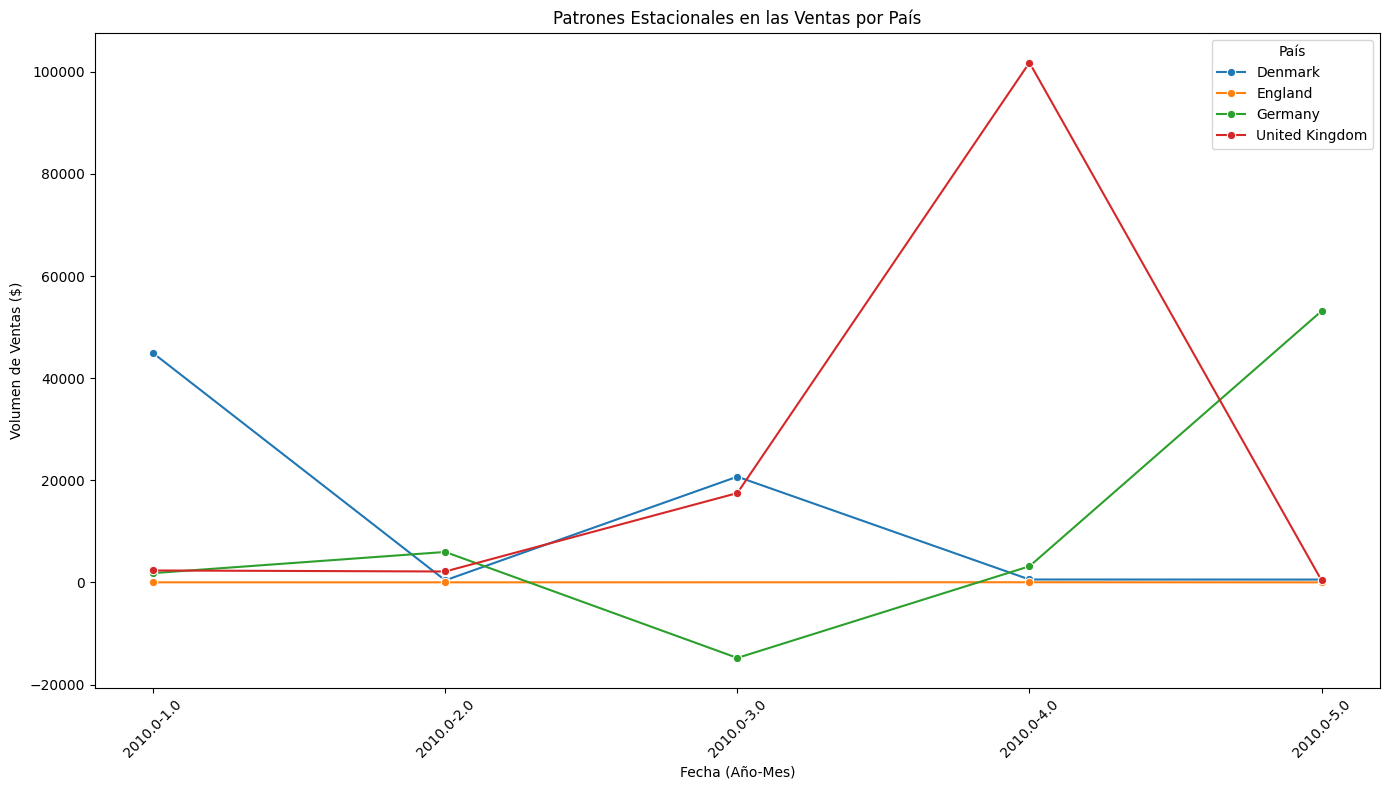

Ventas totales por mes y país:
Country    Year  Month   Denmark  England   Germany  United Kingdom
0        2010.0    1.0  44909.26    20.34   1821.29         2338.83
1        2010.0    2.0    405.99    15.30   5963.15         2139.30
2        2010.0    3.0  20705.91      NaN -14788.70        17495.58
3        2010.0    4.0    571.51    33.15   3158.22       101791.97
4        2010.0    5.0    555.69    12.50  53140.55          379.51


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('Archivos/retail2.csv')

df_1['TotalPrice'] = df_1['UnitPrice'] * df_1['Quantity']
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'], errors='coerce')

df_1['Year'] = df_1['InvoiceDate'].dt.year
df_1['Month'] = df_1['InvoiceDate'].dt.month

# Agrupar los datos por año, mes y país y sumar el 'TotalPrice' para cada combinación
ventas_mes = df_1.groupby(['Year', 'Month', 'Country'])['TotalPrice'].sum().reset_index()

# Crear una columna combinada de Año-Mes para facilitar la visualización
ventas_mes['YearMonth'] = ventas_mes['Year'].astype(str) + '-' + ventas_mes['Month'].astype(str).str.zfill(2)

# Visualizar los datos
plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_mes, x='YearMonth', y='TotalPrice', hue='Country', marker='o')
plt.title('Patrones Estacionales en las Ventas por País')
plt.ylabel('Volumen de Ventas ($)')
plt.xlabel('Fecha (Año-Mes)')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()
plt.show()

# Crear una tabla de ventas totales por mes y país
ventas_totales_mes = ventas_mes.pivot_table(index=['Year', 'Month'], columns='Country', values='TotalPrice', aggfunc='sum').reset_index()

print("Ventas totales por mes y país:")
print(ventas_totales_mes)



##### ANALISIS DE PATRONES ESTACIONALES:
1. `Denmark`
Picos de Ventas:
`Enero`: 44909.26 es el pico más alto.
`Marzo`: 20705.91 es otro pico alto, aunque hay un valor nulo (NaN) que podría indicar datos faltantes.
Observaciones: Hay una gran variabilidad en los datos de ventas. Los meses de enero y marzo tienen picos altos. verificada.

2. `England`
Picos de Ventas:
`Mayo`: 12.50 es el valor más alto, pero comparado con otros países, es bastante bajo.
Observaciones: No parece haber patrones estacionales claros. Los valores son muy bajos en comparación con otros países.

3. `Germany`
Picos de Ventas:
`Mayo`: 53140.55 es el valor más alto.
`Abril`: 3158.22 es notable, pero mucho menor en comparación con mayo.
`Marzo`: -14788.70 muestra un valor negativo, que puede indicar devoluciones significativas o 'errores en los datos'.
Observaciones: Los picos en mayo y los valores negativos en marzo deben ser investigados más a fondo.

4. `United Kingdom`
Picos de Ventas:
`Abril`: 101791.97 es el valor más alto.
`Marzo`: 17495.58 es considerable, pero mucho menor que abril.
Observaciones: Abril muestra un gran pico en ventas, sugiriendo una posible estacionalidad o evento especial.

## Pregunta 18
**Preferencias de Productos:**
- ¿Cuáles son los productos (`StockCode` y `Description`) más vendidos en cada país? ¿Hay diferencias notables en las preferencias de productos entre los países?

In [37]:
import pandas as pd

df_1 = pd.read_csv('Archivos/retail2.csv')

prod_vend = df_1.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Obtener los productos más vendidos por país
prod_mas = prod_vend.sort_values(by=['Country', 'Quantity'], ascending=[True, False])
prod_mas = prod_mas.groupby('Country').head(1).reset_index(drop=True)

print("Productos más vendidos por país:")
print(prod_mas)

print("\nSe compara las preferencias de productos entre los países")
print("y se cuenta la cantidad de cada producto vendido en todos los países")
print("para ver la popularidad global\n")
prod_global = prod_vend.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
prod_global = prod_global.sort_values(by='Quantity', ascending=False)

print("Productos más vendidos globalmente:")
print(prod_global.head(20))

Productos más vendidos por país:
          Country StockCode                         Description  Quantity
0         Denmark    84907B    PACK OF 12 RED RETROSPOT TISSUES       200
1         England    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12
2         Germany     21723  STRIPED CHARLIE+LOLA CHARLOTTE BAG       100
3  United Kingdom    84907B    PACK OF 12 RED RETROSPOT TISSUES       200

Se compara las preferencias de productos entre los países
y se cuenta la cantidad de cada producto vendido en todos los países
para ver la popularidad global

Productos más vendidos globalmente:
   StockCode                          Description  Quantity
75    84907B     PACK OF 12 RED RETROSPOT TISSUES       400
0      21723   STRIPED CHARLIE+LOLA CHARLOTTE BAG       280
6      21731        RED TOADSTOOL LED NIGHT LIGHT       180
17     22111            SCANDINAVIAN REDS RIBBONS       160
15     21914                BLUE HARMONICA IN BOX       144
13     21756                  DOORMAT NEW

##### Diferencias Notables en Preferencias de Productos:

- `Denmark` y `United Kingdom` tienen una preferencia similar por el producto `PACK OF 12 RED RETROSPOT TISSUES`.

- `England` tiene una preferencia por un producto diferente con una cantidad de ventas significativamente menor, indicando que los gustos pueden diferir y que las ventas generales en Inglaterra pueden ser menores o menos concentradas.

- `Germany` tiene un producto más vendido diferente de los otros países, con una cantidad de ventas intermedia.

## Pregunta 19
**Impacto de las Devoluciones en las Ventas:**
- ¿Qué porcentaje de las ventas totales son afectadas por devoluciones (`ReturnStatus`)? ¿Cómo varía este porcentaje entre los diferentes países?

In [67]:
import pandas as pd

# Cargar el archivo CSV desde la nueva ruta
df_1 = pd.read_csv('Archivos/retail2.csv')

# Filtrar las devoluciones
df_returns = df_1[df_1['ReturnStatus'] == 'Returned']

# Calcular ventas totales por país
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']
vent_tot = df_1.groupby('Country')['TotalPrice'].sum().reset_index()
vent_tot.columns = ['Country', 'TotalSales']

# Calcular ventas afectadas por devoluciones por país
df_returns['TotalPrice'] = df_returns['Quantity'] * df_returns['UnitPrice']
devol_vent = df_returns.groupby('Country')['TotalPrice'].sum().reset_index()
devol_vent.columns = ['Country', 'ReturnedSales']

# Unir ambos DataFrames para calcular el porcentaje
df_ventas = pd.merge(vent_tot, devol_vent, on='Country', how='left')
df_ventas['ReturnedSales'] = df_ventas['ReturnedSales'].fillna(0)  # Reemplazar NaN por 0 para países sin devoluciones

# Calcular el porcentaje de ventas afectadas por devoluciones
df_ventas['ReturnPercentage'] = (df_ventas['ReturnedSales'] / df_ventas['TotalSales']) * 100

# Mostrar los resultados
df_ventas_rename = df_ventas.rename(columns={'Country': 'Pais', 'ReturnPercentage': 'Porcentaje_Ventas'})
print("Porcentaje de ventas afectadas por devoluciones por país:")
print(df_ventas_rename[['Pais', 'Porcentaje_Ventas']])


Porcentaje de ventas afectadas por devoluciones por país:
             Pais  Porcentaje_Ventas
0         Denmark          72.527849
1         England          59.601427
2         Germany          34.042658
3  United Kingdom          15.886517


C:\Users\REY\AppData\Local\Temp\ipykernel_652\570378052.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_returns['TotalPrice'] = df_returns['Quantity'] * df_returns['UnitPrice']


- `Variación en los Porcentajes`: Los porcentajes varían notablemente entre los países; `Dinamarca` y `Inglaterra` muestran los porcentajes más altos y el `Reino Unido` el más bajo.

- `Impacto de las Devoluciones`: El alto porcentaje de devoluciones en `Dinamarca` e `Inglaterra` podría señalar áreas para mejorar en términos de satisfacción del cliente o calidad del producto. Las empresas en estos países podrían considerar revisar sus productos, servicios y políticas de devolución para reducir la tasa de devoluciones.

## Pregunta 20
**Análisis de Margen de Ganancia:**
- ¿Cuál es el margen de ganancia promedio (`UnitPrice - Discount`) por producto en cada país? ¿Hay productos o categorías con márgenes significativamente mayores o menores en alguno de los países?

In [69]:
import pandas as pd

df_1 = pd.read_csv('Archivos/retail2.csv')

# Asegurando que el descuento esté en el mismo formato que el precio unitario
df_1['DiscountAmount'] = df_1['UnitPrice'] * (df_1['Discount'] / 100)
df_1['Margin'] = df_1['UnitPrice'] - df_1['DiscountAmount']

# Agrupando los datos por país y producto, y calcular el margen promedio
margen_medio = df_1.groupby(['Country', 'StockCode', 'Description'])['Margin'].mean().reset_index()
margen_medio.columns = ['Country', 'ProductCode', 'ProductDescription', 'AvgMargin']

# Analizar si hay categorías con márgenes significativamente mayores o menores
# Agrupamos por país para ver el margen promedio por producto en cada país
marge_pais = margen_medio.groupby('Country')['AvgMargin'].mean().reset_index()

margen_medio_rename = margen_medio.rename(columns={'Country': 'Pais', 'ProductCode':'Cod_Producto','ProductDescription': 'Descripción','AvgMargin':'Margen_Medio'})

marge_pais_rename= marge_pais.rename(columns={'Country': 'Pais','AvgMargin':'Margen_Medio'})

print("\nMargen de ganancia promedio por producto en cada país:")
print(margen_medio_rename.to_string(index=False))


Margen de ganancia promedio por producto en cada país:
          Pais Cod_Producto                                      Descripción  Margen_Medio
       Denmark        21723               STRIPED CHARLIE+LOLA CHARLOTTE BAG      2.087936
       Denmark        21723               striped charlie+lola charlotte bag      1.492995
       Denmark        21724                            RED  HARMONICA IN BOX      0.753250
       Denmark        21724                             RED HARMONICA IN BOX      0.807250
       Denmark        21724                           RED HARMONICA IN BOX        0.864375
       Denmark        21730                GLASS STAR FROSTED T-LIGHT HOLDER     77.827275
       Denmark        21731                    RED TOADSTOOL LED NIGHT LIGHT      1.180740
       Denmark        21731                  RED TOADSTOOL LED NIGHT LIGHT        0.846945
       Denmark        21754                         HOME BUILDING BLOCK WORD      5.557449
       Denmark        21755       

Se puede ver que en los resultados que la agrupacion es 'Pais', 'Cod_Producto' y 'Descripción', hace la tabla muy extensa por las filas, esto es debido a que en muchos registros, el mismo codigo esta asociado a 'descripciones diferentes' (producto de errores en la captura de la información), por ejemplo:

<table>
  <thead>
    <tr>
      <th>Pais</th>
      <th>Cod_Producto</th>
      <th>Descripción</th>
      <th>Margen_Medio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Denmark</td>
      <td>21724</td>
      <td><pre> RED HARMONICA IN BOX</pre></td>
      <td>0.753250</td>
    </tr>
    <tr>
      <td>Denmark</td>
      <td>21724</td>
      <td><pre>  RED HARMONICA IN BOX</pre></td>
      <td>0.807250</td>
    </tr>
    <tr>
      <td>Denmark</td>
      <td>21724</td>
      <td><pre>RED HARMONICA IN BOX</pre></td>
      <td>0.864375</td>
    </tr>
  </tbody>
</table>

En realidad esto debia ser:

<table>
  <thead>
    <tr>
      <th>Pais</th>
      <th>Cod_Producto</th>
      <th>Descripción</th>
      <th>Margen_Medio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Denmark</td>
      <td>21724</td>
      <td> RED HARMONICA IN BOX</td>
      <td>2.124875</td>
    </tr>
  </tbody>
</table>


Es notable que hay diferencias en la `Descripcion` en cuanto a 'los espaciados' al principio y al final de la descripción del producto, en este ejemplo podemos observar que en realidad se está hablando del mimso producto

Esto es un error que suele suceder por un mal diseño de la base de datos, haciendo un mal uso de la 'normalizacion de las tablas' y crear codificadores codificadores para restringir la escritura directa de las descripciones en un formulario de captura.

Al estar agrupado por los tres campos mencionados, hace entonces, que cada registro diferente.

Por tanto se sugiere una limpieza minuciosa de los datos antes de realizar cualquier analisis.

In [68]:
print("\nMargen de ganancia promedio por país:")
print(marge_pais_rename.to_string(index=False))



Margen de ganancia promedio por país:
          Pais  Margen_Medio
       Denmark     14.647311
       England      1.949152
       Germany     30.404103
United Kingdom     13.768953


En algunos países, ciertos productos o categorías tienen márgenes de ganancia significativamente mayores o menores. Este patrón puede deberse a estrategias de mercado locales, diferencias en el poder adquisitivo de los consumidores o políticas específicas de descuentos. Esto es relevante para identificar oportunidades de mejora en 'pricing' o promociones por región.